![alttext](https://github.com/UrbsLab/STREAMLINE/blob/main/info/Pictures/STREAMLINE_Logo_Full.png?raw=true)

# GOOGLE COLAB NOTEBOOK README
STREAMLINE is an end-to-end automated machine learning (AutoML) pipeline that empowers anyone to easily run, interpret, and apply a rigorous and customizable analysis for data mining or predictive modeling. Currently limited to binary classification in tabular data.

* This notebook runs all primary elements STREAMLINE. We recommend users review the STREAMLINE documentation for details.

## What to expect running this notebook 'as-is'?
* This notebook has been initially set up to run 'as-is' on two 'demo' datasets: (1) hcc-data_example.csv: the original HCC dataset downloaded from the UCI repository and (2) hcc-data_example_custom.csv: a 'custom' datasets which removes the two covariate features from the HCC dataset, and adds simulated features and instances to it to explicitly test aspects of data preprocessing (i.e. cleaning and feature engineering). Suggested default STREAMLINE run parameters are already specified. 

* After model training and testing evaluations are complete, the models trained from hcc-data_example_custom.csv are applied to a 'replication' dataset (hcc-data_example_custom_rep.csv) for another round of evaluations. Since no true replication data was available for this example, we simulated a replication dataset by taking the original hcc-data_example_custom.csv data and randomly resampling feature values for 30% of instances in the data to add some noise/variation to it.

* Notebook run parameters have initially been set up to run only three of the available modeling algorithms (logistic regression, decision tree, and naive bayes), with 3-fold CV so that it runs completely in about 6-7 minutes. 

* As the notebook run completes, the PDF summary(s) and zipped output folder will automatically downloaded to your computer. You will likely be propted to accept the download on your first run. 

## Run Instructions for this Notebook
* For Demo:
  * Leave all run parameter cells (below) unchanged and choose 'RunAll' under 'Runtime' tab in Colab Notebook
  * You can optionally change non-dataset related run parameters below to run the demo with different settings

* Custom Dataset Run: 

  * Easy Mode:
    * Set (demo_run = False) and (use_data_prompt = True), then edit the remaining run parameters below as desired, excluding dataset parameters
    * Choose 'RunAll' under 'Runtime' tab in Colab Notebook.
    * When notebook runs, the user will first be prompted to load datasets, and specify other critical dataset parameters. This includes:
      * (Required) The output folder name for the current STREAMLINE experiment
      * (Required) Selecting dataset(s) for STREAMLINE analysis
      * Specifying (without single or double quotation marks):
        * (Required) class column label
        * (If present) instanceID column label, otherwise type (None)
        * (If present) Match column label (for covariate matched data), otherwise type (None)      
      * (Required) If replication data is available
        * (If available) Selecting dataset(s) for replication evaluation
        * (If available) Specifying the name of the target dataset (including file extension) whos models the replication data will be evaluating

  * Manual Mode:
    * Set (demo_run = False) and (use_data_prompt = False)
    * Manually create a folder in /content/ (i.e. locally in the google colab workspace) 
    * Edit all run parameters accordingly, including target dataset filepaths
    * Choose 'RunAll' under 'Runtime' tab in Colab Notebook.
* Before running the STREAMLIN notebook again we generally recommend selecting "Disconnect and delete runtime' under 'Runtime' tab in Colab Notebook.

--------------

# STREAMLINE RUN PARAMETERS
The first two paramters below are specific to this Google Colab notebook.

In [1]:
demo_run = True # Leave (True) to run the demo dataset, make (False) to have new temporary folder created to upload datasets
use_data_prompt = True # Generally leave as (True) unless you want to dissable the prompts (that allows users to run their own data without changing the dataset run parameters in this notebook)

### Run Parameters: Target Datasets (Ignore if Running Demo Data)
* No need to edit unless (demo_run = False) and (use_data_prompt = False).
* Update these parameters to run STREAMLINE on a different folder of datasets. Any folder of datasets to be analyzed should include one or more datasets saved as .txt or .csv files. See documentation for dataset formatting requirements. 

* All datasets should have the same header names for the class, instance, and match labels (note instance and match labels are optional). 

In [2]:
if not demo_run: # Leave this command as is.

    # File path to the folder containing dataset(s) to be analyzed (must include one or more .txt, .tsv, or .csv datasets)
    data_path = "/content/UserData" # (str) Data Folder Path

    # Output foder path: where to save pipeline outputs (must be updated for a given user)
    output_path = '/content/UserOutput' # (str) Ouput Folder Path (folder will be created by STREAMLINE automatically)

    # Unique experiment name - folder created for this analysis within output folder path
    experiment_name = 'my_experiment'  # (str) Experiment Name (change to save a new STREAMLINE run output folder instead of overwriting previous run)

    # Data Labels
    class_label = 'Class' # (str) i.e. class outcome column label
    instance_label = 'InstanceID' # (str) If data includes instance labels, given respective column name here, otherwise put 'None'
    match_label = None # (str or None) Only applies when M selected for partition-method; indicates column label with matched instance ids' 

    # Option to manually specify feature names to leave out of analysis, or which to treat as categorical (without using built in variable type detector)
    ignore_features = None # list of column names (given as string values) to exclude from the analysis (only insert column names if needed, otherwise leave empty)
    categorical_feature_headers = None # empty list for 'auto-detect' otherwise list feature names (given as string values) to be treated as categorical. Only impacts algorithms that can take variable type into account.

### Run Parameters: General
* Optionally update these general parameters used throughout all/most phases of the pipeline.

In [3]:
# Cross Validation (CV)
n_splits = 3  # (int, > 1) Number of training/testing data partitions to create - and resulting number of models generated using each ML algorithm
partition_method = 'Stratified' # (str) for Stratified, Random, or Group, respectively

# Cutoffs
categorical_cutoff = 10 # (int) Number of unique values after which a variable is considered to be quantitative vs categorical if categorical_features_headers not specified.
sig_cutoff = 0.05 # (float, 0-1) Significance cutoff used throughout pipeline
# Set Random Seed for Reproducible Analysis
random_state = 42 # (int) Sets a specific random seed for reproducible results

### Run Parameters: Data Processing
* Optionally, update these parameters to decide what analyses are run and outputs are produced by STREAMLINE in the exploratory analysis phase.

In [4]:
# Analysis options to turn on or off in the exploratory analysis ("Describe" = basic descriptive data stats, "Differentiate")
exploration_list = ["Describe", "Univariate Analysis", "Feature Correlation"] # (list of strings) Options:["Describe", "Differentiate", "Univariate Analysis"]

# Control what exploratory analysis plots get generated
plot_list = ["Describe", "Univariate Analysis", "Feature Correlation"] # (list of strings) Options:["Describe", "Univariate Analysis", "Feature Correlation"]

# univariate analysis plots (note: univariate analysis still output by default)
top_features = 20 # (int) Number of top features to report in notebook for univariate analysis

featureeng_missingness = 0.5 # (float, 0-1) Percentage of missing after which categorical featrure identifier is generated.
cleaning_missingness = 0.5 # (float, 0-1) Percentage of missing after instance and feature removal is performed.
correlation_removal_threshold = 1 # (float, 0-1)

### Run Parameters: Scaling and Imputing
* Optionally update these parameters to turn specific data preprocessing options on or off.

In [5]:
# Data Transformation (i.e. scaling) - important for running and interpreting built-in feature importance estimates for certain ML modeling algorithms 
scale_data = True # (bool, True or False) Perform data scaling

# Missing Data Imputation Options
impute_data = True # (bool, True or False) Perform missing value data imputation? (required for most ML algorithms if missing data is present)
multi_impute = True # (bool, True or False) Applies multivariate imputation to quantitative features, otherwise uses mean imputation

# Option for how cross validation datasets are saved (for external use)
overwrite_cv = True # (bool, True or False) Overwrites earlier cv datasets with new scaled/imputed ones

### Run Parameters: Feature Importance Estimation
* Optionally update these parameters to decide which filter-based feature importance estimation algorithms to apply (currently only mutual information and MultiSURF are options). 

In [6]:
# Available Filter-based Feature Importance/Selection Algorithms
do_mutual_info = True # (bool, True or False) Do mutual information analysis
do_multisurf = True # (bool, True or False) Do multiSURF analysis

# Additional MultiSURF Options
use_TURF = False # (bool, True or False) Use TURF wrapper around MultiSURF
TURF_pct = 0.5 # (float, 0.01-0.5) Proportion of instances removed in an iteration (also dictates number of iterations)
instance_subset = 2000 # (int) Sample subset size to use with MultiSURF (since MultiSURF's compute time scales quadratically with instance count)
njobs = -1 # (int) Number of cores dedicated to running algorithm; setting to -1 will use all available cores when run locally

### Run Parameters: Feature Selection
* Optionally update these parameters to control how 'collective' feature selection is conducted prior to modeling. 

  * When 'filter_poor_features' = False, all features will be used in the modeling phase. 

  * When 'filter_poor_features' = True: 
    * And 'max_features_to_keep' = 'None', all features with a score <= 0 from all active feature importance algorithm will be removed, but the rest kept. 

    * And 'max_features_to_keep' = n (where n is a 'value' less than the total number of features in the dataset), first all features with a score <= 0 from all active feature importance algorithm will be removed, then the top n scoring (non-redundant) features from each algorithm will be kept. 

In [7]:
# Turn feature selection on or off 
filter_poor_features = True # (bool, True or False) Filter out the worst performing features prior to modeling

# Control maximum number of features to keep out of total features in dataset.
max_features_to_keep = 2000 # (int) Maximum features to keep. 'None' if no max

# Controls the feature importance estimation plots generation
top_features = 40 # (int) Number of top features to illustrate in figures
export_scores = True # (bool, True or False) Export figure summarizing average feature importance scores over cv partitions

### Run Parameters: Modeling
* Optionally update these parameters to control what modeling algorithms are run, as well as other options relevant to the modeling phase. The 16 Classification algorithms currently available in STREAMLINE include:

  * Naive Bayes (NB)
  * Logistic Regression (LR)
  * Elastic Net (EN)
  * Decision Tree (DT)
  * Random Forest (RF)
  * Gradient Boosting (GB)
  * Extreame Gradient Boosting (XGB)
  * Light Gradient Boosting (LGB)
  * Category Gradient Boosting (CGB)
  * Support Vector Machines (SVM)
  * Artificial Neural Networks (ANN)
  * K-Nearest Neighbors (KNN)
  * Genetic Programming, i.e. symbolic classification (GP)
  * Educational Learning Classifier System (eLCS)
  * 'X' Classifier System (XCS)
  * Extended Supervised Tracking Classifier System (ExSTraCS)

The last 3 algorithms above are rule-based ML approaches implemented by our research group. Their are currently suspected bugs in eLCS and XCS so they have been turned off when using default settings.


In [8]:
# Machine Learning Algorithms to Run (Setting 'algorithms' to 'None' rather than a list will run all algorithms except those specified in 'exclude')
algorithms = ["NB", "LR", "DT"] # (list of strings) Options: ["NB","LR","EN","DT","RF","GB","XGB","LGB","CGB","SVM","ANN","KNN","GP","eLCS","XCS","ExSTraCS"]

# ML Model Algorithm to exclude
exclude = ['eLCS', 'XCS'] # (list of strings) Options: ["NB","LR","EN","DT","RF","GB","XGB","LGB","CGB","SVM","ANN","KNN","GP","eLCS","XCS","ExSTraCS"]

# Other Analysis Parameters
training_subsample = 0  # (int) For long running algorithms, option to subsample training set (0 for no subsample) Limit Sample Size Used to train algorithms that do not scale up well in large instance spaces (i.e. XGB,SVM,KN,ANN,and LR to a lesser degree) and depending on 'instances' settings, ExSTraCS, eLCS, and XCS)
use_uniform_FI = True # (bool, True or False) Overides use of any available feature importances estimate methods from models, instead using permutation_importance uniformly
primary_metric = 'balanced_accuracy' # (str) Must be an available metric identifier from (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
metric_direction = 'maximize' # (str, either of 'maximize' or 'minimize')

# Hyperparameter Sweep Options
n_trials = 200   # (int or None) Number of bayesian hyperparameter optimization trials using optuna
timeout = 900    # (int or None) Seconds until hyperparameter sweep stops running new trials (Note: it may run longer to finish last trial started)
export_hyper_sweep_plots = True # (bool, True or False) Export hyper parameter sweep plots from optuna

# Learning classifier system algorithm options (ExSTraCS, eLCS, XCS)
do_lcs_sweep = False # (bool, True or False) Do LCS hyperparam tuning or use below params
lcs_nu = 1                 # (int, 0-10) Fixed LCS nu param
lcs_iterations = 200000    # (int, > data sample size) Fixed LCS # learning iterations param
lcs_N = 2000               # (int) > 500) Fixed LCS rule population maximum size param
lcs_timeout = 1200     # (int) Seconds until hyperparameter sweep stops for LCS algorithms (evolutionary algorithms often require more time for a single run)

### Run Parameters: Evaluation Figure Generation (Stats Phase)
* Optionally update these parameters to control aspects of model evaluation figure generation. Note that all STREAMLINE performance metric evaluations and figures are generated with respect to the hold out testing data in this phase.

In [9]:
# ROC and PRC Plot Generation for Individual Algorithms (including separate curves for each CV model trained)
plot_ROC = True    # (bool, True or False) Plot ROC curves individually for each algorithm including all CV results and averages
plot_PRC = True    # (bool, True or False) Plot PRC curves individually for each algorithm including all CV results and averages

# Feature Importance Plots (for each algorithm)
plot_FI_box = True # (bool, True or False) Plot feature importance boxplots for each algorithm

# Box Plots Comparing Algorithm Performance (for each evaluation metric)
plot_metric_boxplots = True # (bool, True or False) Plot box plot summaries comparing algorithms for each metric

# Composite Feature Importance Plot Setting
metric_weight = 'balanced_accuracy' # (str, balanced_accuracy or roc_auc) ML model metric used as weight in composite FI plots (only supports balanced_accuracy or roc_auc as options) Recommend setting the same as primary_metric if possible.

# Feature Importance Plot Setting (impacts individual feature importance plots for each algorith and the composite feature importance plot)
top_model_features = 40  # (int) Number of top features in model to illustrate in feature importance figures

### Run Parameters: Replication Data (Ignore if Running Demo Data)
* Don't edit unless (demo_run = False) and (use_data_prompt = False).

* Update these parameters to run STREAMLINE's 'apply' phase where all models trained in the earlier phases are evaluated on the same hold-out replication data (recommended when available).

* Multiple replication datasets (e.g. data collected from different sites) can be included in the replication data folder and STREAMLINE will apply replication analyses to each individually. 

In [10]:
if not demo_run: # Leave this command as is.

   # Turns the replication data analysis phase on or off
    applyToReplication = True # (bool, True or False) Leave false unless you have a replication dataset handy to further evaluate/compare all models in uniform manner

    # File path to the folder containing the replication dataset(s) to be evaluated using previously trained models (.txt, .tsv, or .csv datasets))
    rep_data_path = "/content/UserRepData" # (txt) Name of folder with replication Dataset(s)

    # File path to one of the individual datasets used to train models within STREAMLINE
    dataset_for_rep = "/content/UserData/user_data_example.csv" # (txt) Path and name of an individual dataset used to generate the models being evaluated with replication data

### Run Parameters: Output File Cleanup
* Optionally update these parameters to delete temporary files in output folder (generally recommended to leave these as True).

In [11]:
del_time = True  # (bool, True or False) Delete individual run-time files (but save summary)
del_old_cv = True # (bool, True or False) Delete any of the older versions of CV training and testing datasets if overwrite_cv was set to False (preserves training and testing datasets used in pipeline)

-------------

# Users - We recommend you do not make code edits below this cell.

--------------

# DEMO DATA ANALYSIS SETUP 


### Demo Data Run Parameters:
* Set up for Demo Run (never edit the code cell below)


In [12]:
if demo_run: # Leave this command as is.

    # File path to the folder containing dataset(s) to be analyzed (must include one or more .txt, .tsv, or .csv datasets)
    data_path = "/content/STREAMLINE/data/DemoData" # (str) Data Folder Path

    # Output foder path: where to save pipeline outputs (must be updated for a given user)
    output_path = '/content/DemoOutput' # (str) Ouput Folder Path (folder will be created by STREAMLINE automatically)

    # Unique experiment name - folder created for this analysis within output folder path
    experiment_name = 'demo_experiment'  # (str) Experiment Name (change to save a new STREAMLINE run output folder instead of overwriting previous run)

    # Data Labels
    class_label = 'Class' # (str) i.e. class outcome column label
    instance_label = 'InstanceID' # (str) If data includes instance labels, given respective column name here, otherwise put 'None'
    match_label = None # (str or None) Only applies when M selected for partition-method; indicates column label with matched instance ids' 

    # Option to manually specify feature names to leave out of analysis
    ignore_features = None # list of column names (given as string values) to exclude from the analysis (only insert column names if needed, otherwise leave empty)

    # Recommended option to manually specify what features to treat as categorical (None for 'auto-detect', otherwise list feature names (given as string values) to be treated as categorical. 
    # See https://archive.ics.uci.edu/ml/datasets/HCC+Survival for breakdown of feature types: nominal (i.e. categorical), or ordinal, continuous and integer (i.e. quantitative)
    categorical_feature_headers = ['Gender','Symptoms','Alcohol','Hepatitis B Surface Antigen','Hepatitis B e Antigen','Hepatitis B Core Antibody','Hepatitis C Virus Antibody','Cirrhosis',
                                   'Endemic Countries','Smoking','Diabetes','Obesity','Hemochromatosis','Arterial Hypertension','Chronic Renal Insufficiency','Human Immunodeficiency Virus',
                                   'Nonalcoholic Steatohepatitis','Esophageal Varices','Splenomegaly','Portal Hypertension','Portal Vein Thrombosis','Liver Metastasis','Radiological Hallmark',
                                   'Sim_Cat_2','Sim_Cat_3','Sim_Cat_4','Sim_Text_Cat_2','Sim_Text_Cat_3','Sim_Text_Cat_4'] 

    # Turns the replication data analysis phase on or off
    applyToReplication = True # (bool, True or False) Leave false unless you have a replication dataset handy to further evaluate/compare all models in uniform manner

    # File path to the folder containing the replication dataset(s) to be evaluated using previously trained models (.txt, .tsv, or .csv datasets))
    rep_data_path = "/content/STREAMLINE/data/DemoRepData" # (txt) Name of folder with replication Dataset(s)

    # File path to one of the individual datasets used to train models within STREAMLINE
    dataset_for_rep = "/content/STREAMLINE/data/DemoData/hcc-data_example_custom.csv" # (txt) Path and name of an individual dataset used to generate the models being evaluated with replication data

-------------

# PROMPT SETUP FOR DATASET PARAMETERS

In [13]:
def run_prompts(demo_run,use_data_prompt,original_wd):
    import os

    output_path = '/content/UserOutput' # Make separate ouput folder to save STREAMLINE experiment runs on non-demo data

    # Get and save user datasets locally
    custom_data_path = '/content/UserData' # Make local folder for saving user specified target datasets for STREAMLINE anlaysis

    # Check if the directory exists
    if not os.path.exists(custom_data_path):
        # Create the directory if it doesn't exist
        os.makedirs(custom_data_path)
    else:
        # Traverse the directory tree and delete all files and directories
        for root, dirs, files in os.walk(custom_data_path, topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))
        os.rmdir(custom_data_path)
        os.makedirs(custom_data_path)

    os.chdir(custom_data_path)

    # Ask user for unique experiment name (we do this first so the screen jumps to this prompt)
    experiment_name = input("Enter unique experiment name for output folder (required, no spaces): \n")

    # Have user upload target dataset(s)
    from google.colab import files
    uploaded = files.upload() # Prompt user to select one or more datasets to upload into the 'UserData' folder
    os.chdir(original_wd)

    # Gather other necessary target data information
    class_label = input("Enter header label of class column (required): \n")
    instance_label = input("Enter header label of instance ID or specify None: \n")
    match_label = input("Enter header label of match column or specify None: \n")
    if instance_label == "None":
        instance_label = None
    if match_label == "None":
        match_label = None

    # Ask user whether replication dataset(s) are available
    applyToReplication = eval(input("Is replication data available? Enter True or False (required): \n"))
    custom_rep_data_path = None
    dataset_for_rep = None
    if applyToReplication:
        custom_rep_data_path = '/content/UserRepData' # Make local folder for saving user specified target datasets for STREAMLINE anlaysis

        # Check if the directory exists
        if not os.path.exists(custom_rep_data_path):
            # Create the directory if it doesn't exist
            os.makedirs(custom_rep_data_path)
        else:
            # Traverse the directory tree and delete all files and directories
            for root, dirs, files in os.walk(custom_rep_data_path, topdown=False):
                for name in files:
                    os.remove(os.path.join(root, name))
                for name in dirs:
                    os.rmdir(os.path.join(root, name))
            os.rmdir(custom_rep_data_path)
            os.makedirs(custom_rep_data_path)

        os.chdir(custom_rep_data_path)

        # Have user upload replication dataset(s)
        from google.colab import files
        uploaded = files.upload() # Prompt user to select one or more datasets to upload into the 'UserData' folder
        os.chdir(original_wd)

        #Have user idenify the name of the target dataset used to train the model to which the replication dataset(s) will be applied
        dataset_for_rep = custom_data_path +'/'+ input('Enter the filename (with extension) of the dataset in /UserData/ to indicate which models the replication data will be applied to: \n')

    return custom_data_path,custom_rep_data_path,class_label,instance_label,match_label,dataset_for_rep,applyToReplication,experiment_name

In [14]:
import os

# Get current working directory
original_wd = os.getcwd()

if not demo_run and use_data_prompt:
    # Run User Prompts
    data_path,rep_data_path,class_label,instance_label,match_label,dataset_for_rep,applyToReplication,experiment_name = run_prompts(demo_run,use_data_prompt,original_wd)

In [15]:
# Leave this empty code cell

# STREAMLINE RUN CODE


## Install STREAMLINE and Prerequisites
* Downloads most recent version of STREAMLINE from GitHub and installs other packages required by STREAMLINE. 

In [16]:
!git clone -b main https://github.com/UrbsLab/STREAMLINE.git -q
#!git clone -b dev https://github.com/UrbsLab/STREAMLINE.git -q

%cd STREAMLINE

!pip install -r requirements.txt &> /dev/null
!pip install --upgrade scipy>=1.8.0

/content/STREAMLINE


## Notebook Housekeeping
* Sets up notebook cells to display internal process. 

* Use logging.INFO for higher level output, logging.WARNING for only critical information. Comment to hide all text output.

* You can use run_parallel=True for phases other than modeling, but the advantage is not significant vs the overhead for small jobs.

In [17]:
import logging
FORMAT = '%(levelname)s: %(message)s'
logging.basicConfig(format=FORMAT)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

* Housekeeping code allowing notebook to be run again with the same settings, overwriting a previously run experiment with the same name.

In [18]:
import os
import shutil
if os.path.exists(output_path+'/'+experiment_name):
    shutil.rmtree(output_path+'/'+experiment_name)

## STREAMLINE Workflow
* The code below runs through the analysis phases of STREAMLINE.

## Phase 1: Data Processing Phase
After cell runs, for each target dataset you will see:
* A data count summary
* Class balance barplot
* Feature correlation heatmap
* Top univariate analysis results


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:root:Loading Dataset: hcc-data_example_custom
INFO:root:Initial Data Counts: ----------------
INFO:root:Instance Count = 169
INFO:root:Feature Count = 61
INFO:root:    Categorical  = 29
INFO:root:    Quantitative = 32
INFO:root:Missing Count = 1138
INFO:root:    Missing Percent = 0.11038898050247356
INFO:root:Class Counts: ----------------
INFO:root:Class Count Information
INFO:root:
   Class  Instances
0    0.0        104
1    1.0         63
INFO:root:Identifying Feature Types...
INFO:root:Ordinal encoding the following features:
INFO:root:	Sim_Text_Cat_2
INFO:root:	Sim_Text_Cat_3
INFO:root:	Sim_Text_Cat_4
INFO:root:Running Feature Engineering
INFO:root:Engineering the following Features for missingness:
INFO:root:	 miss_Sim_Miss_0.6
INFO:root:	 miss_Sim_Miss_0.7
INFO:root:Removing the following Features due to Missingness:
INFO:root:	Sim_Miss_0.6
INFO:root:	Sim_Miss_0.7
INFO:root:One-hot encoding the following features:
INFO:ro

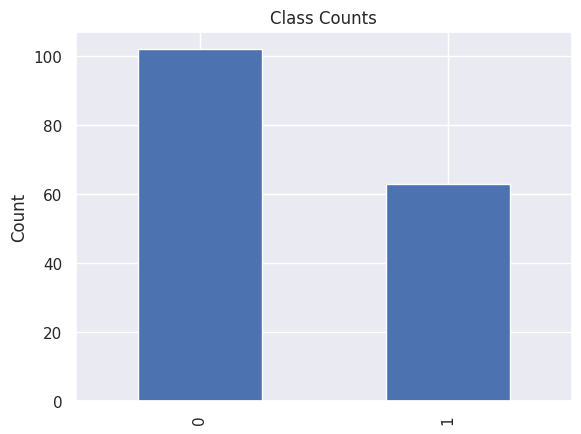

INFO:root:Generating Feature Correlation Heatmap...


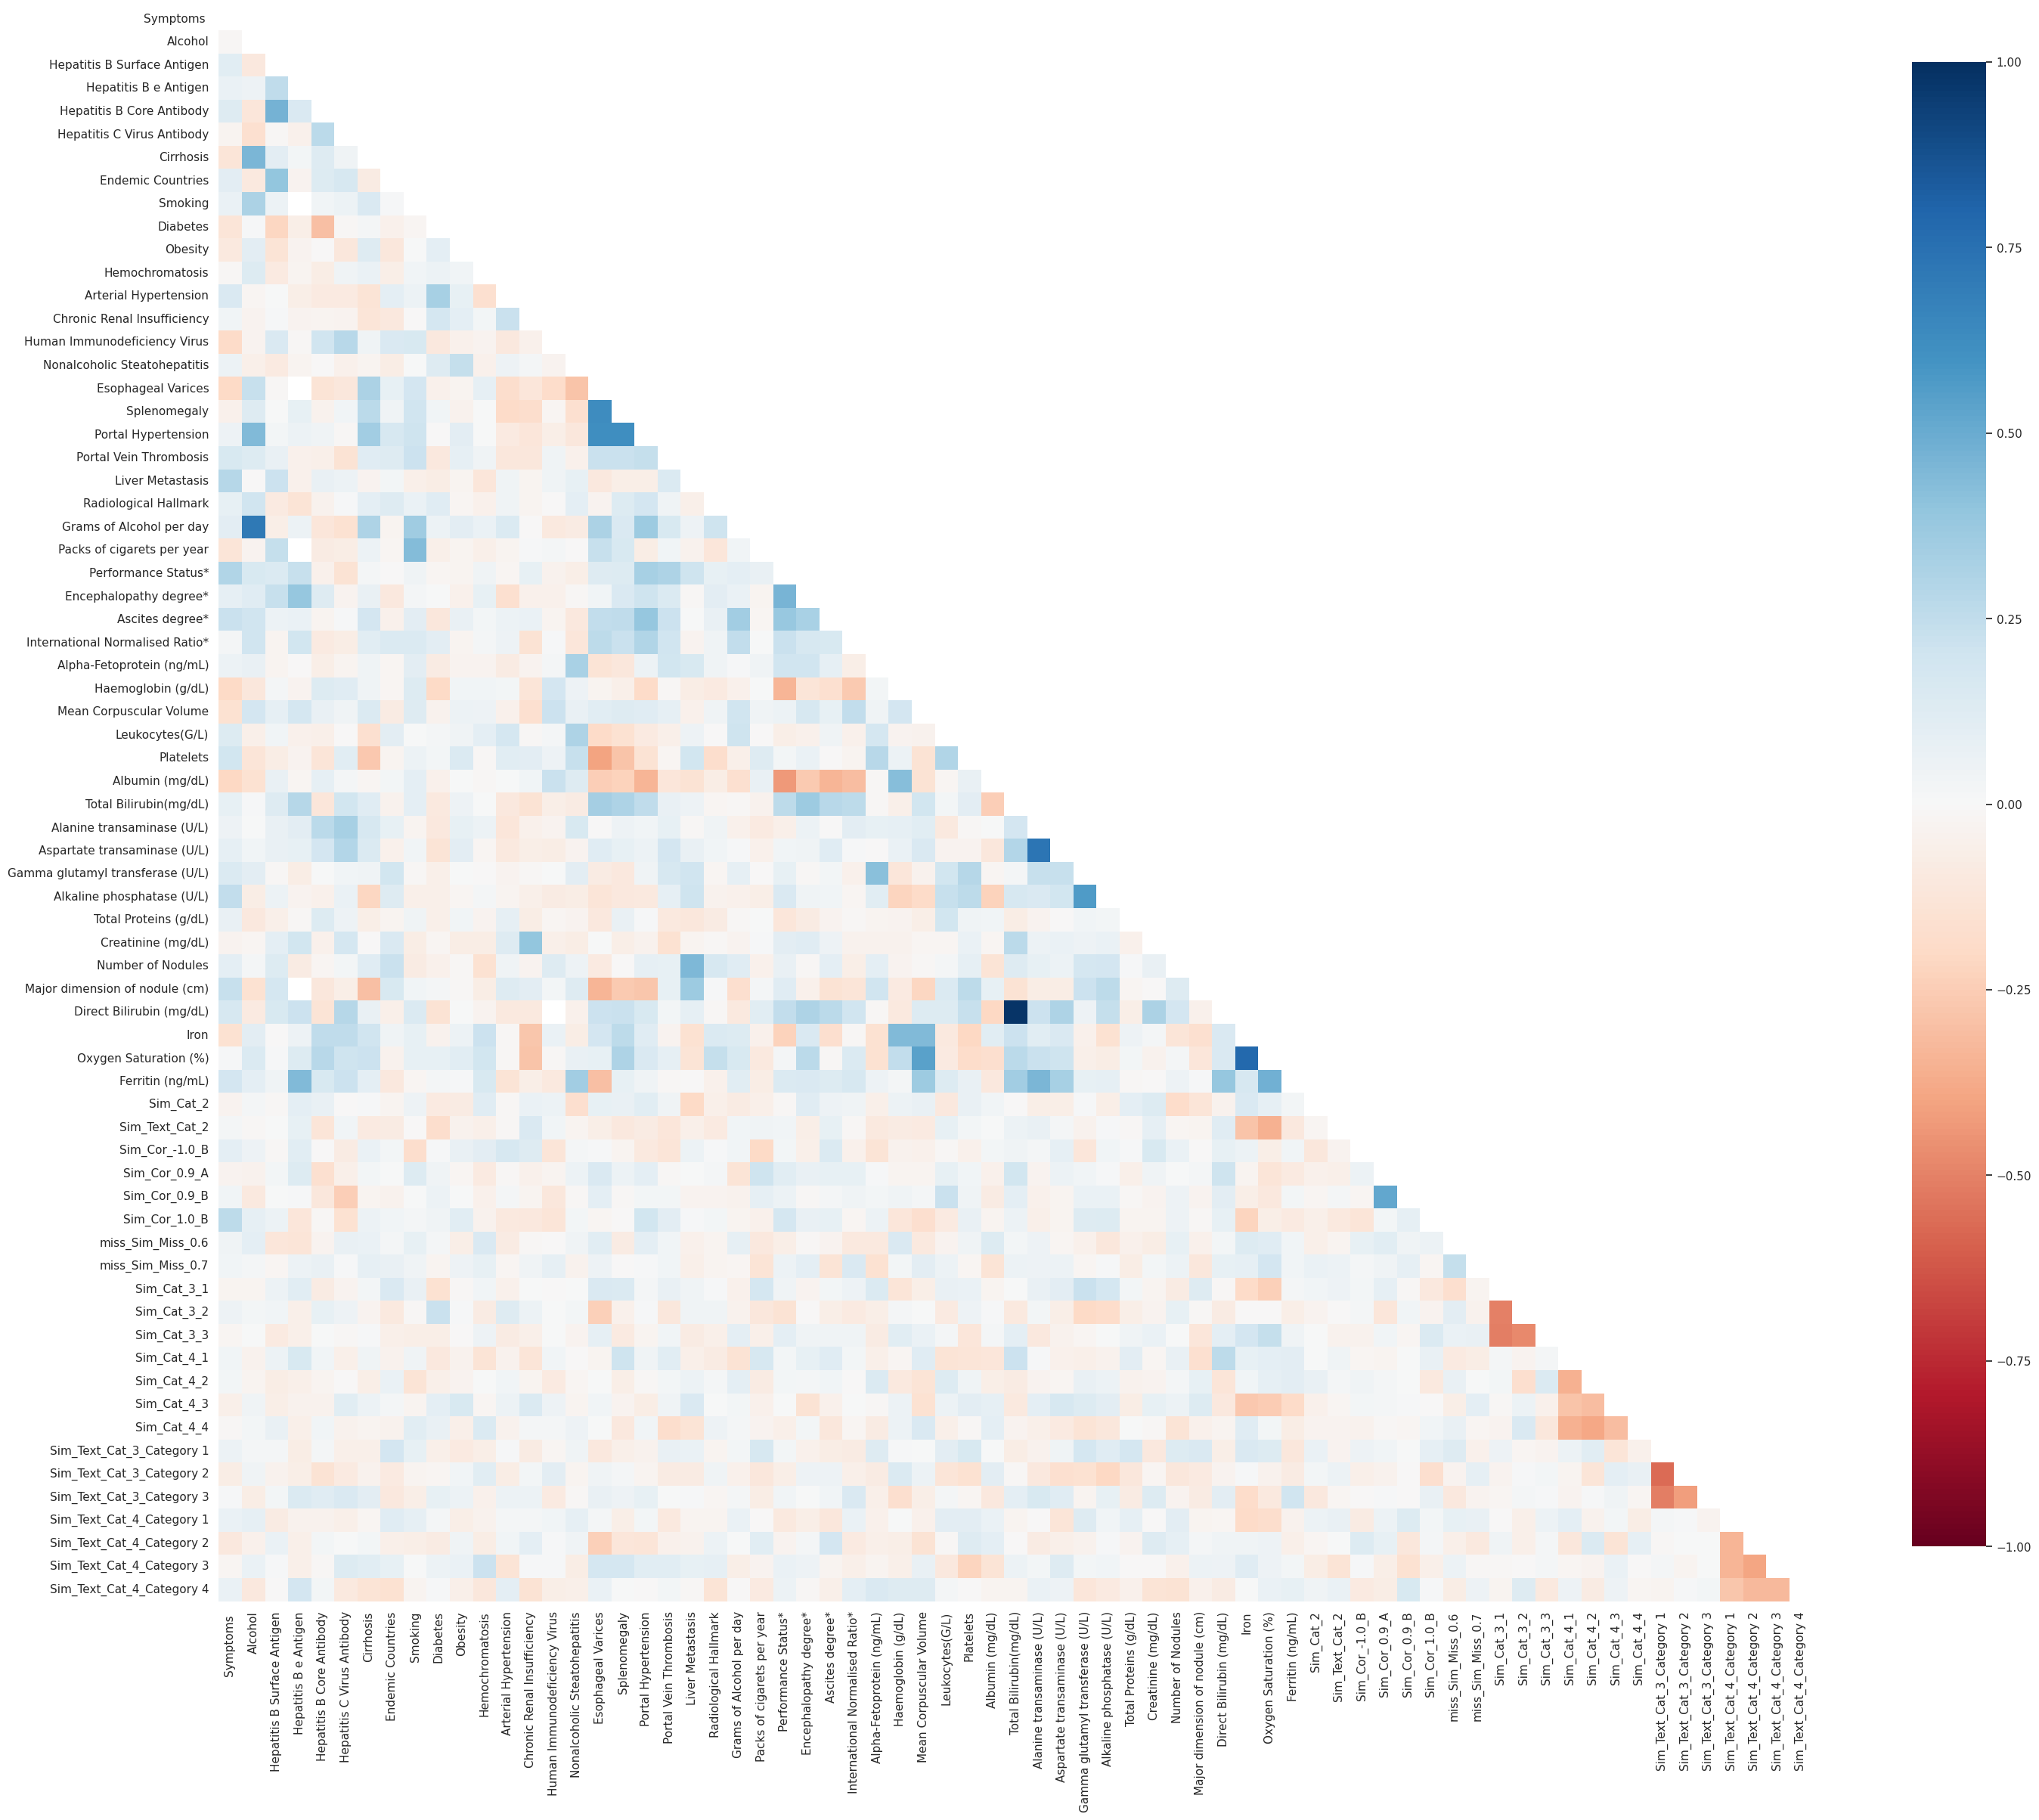

INFO:root:Running Univariate Analyses...
INFO:root:Plotting top significant 40 features.
INFO:root:###################################################
INFO:root:Significant Univariate Associations:
INFO:root:Alkaline phosphatase (U/L): (p-val = 8.425494437393163e-07)
INFO:root:Performance Status*: (p-val = 1.8787043290235831e-06)
INFO:root:Alpha-Fetoprotein (ng/mL): (p-val = 3.7632257667465082e-06)
INFO:root:Haemoglobin (g/dL): (p-val = 6.806983230077955e-05)
INFO:root:Albumin (mg/dL): (p-val = 0.0002097286566980117)
INFO:root:Symptoms : (p-val = 0.00033485297415731147)
INFO:root:Ascites degree*: (p-val = 0.0010580963945994142)
INFO:root:Direct Bilirubin (mg/dL): (p-val = 0.0013544764761447027)
INFO:root:Aspartate transaminase (U/L): (p-val = 0.0016188344745582482)
INFO:root:Ferritin (ng/mL): (p-val = 0.0019988859548087426)
INFO:root:Liver Metastasis: (p-val = 0.002993588224869906)
INFO:root:Iron: (p-val = 0.009131914019954513)
INFO:root:Portal Vein Thrombosis: (p-val = 0.0117430411554

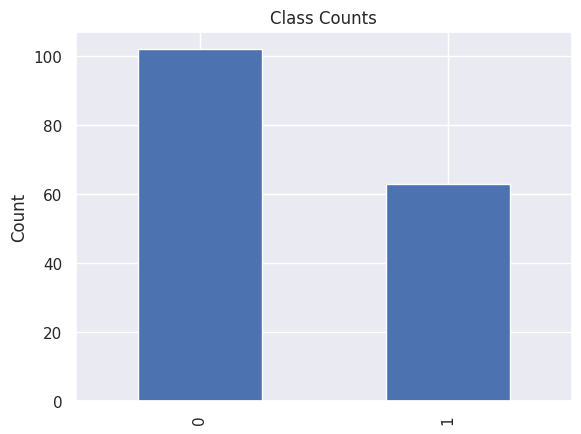

INFO:root:Generating Feature Correlation Heatmap...


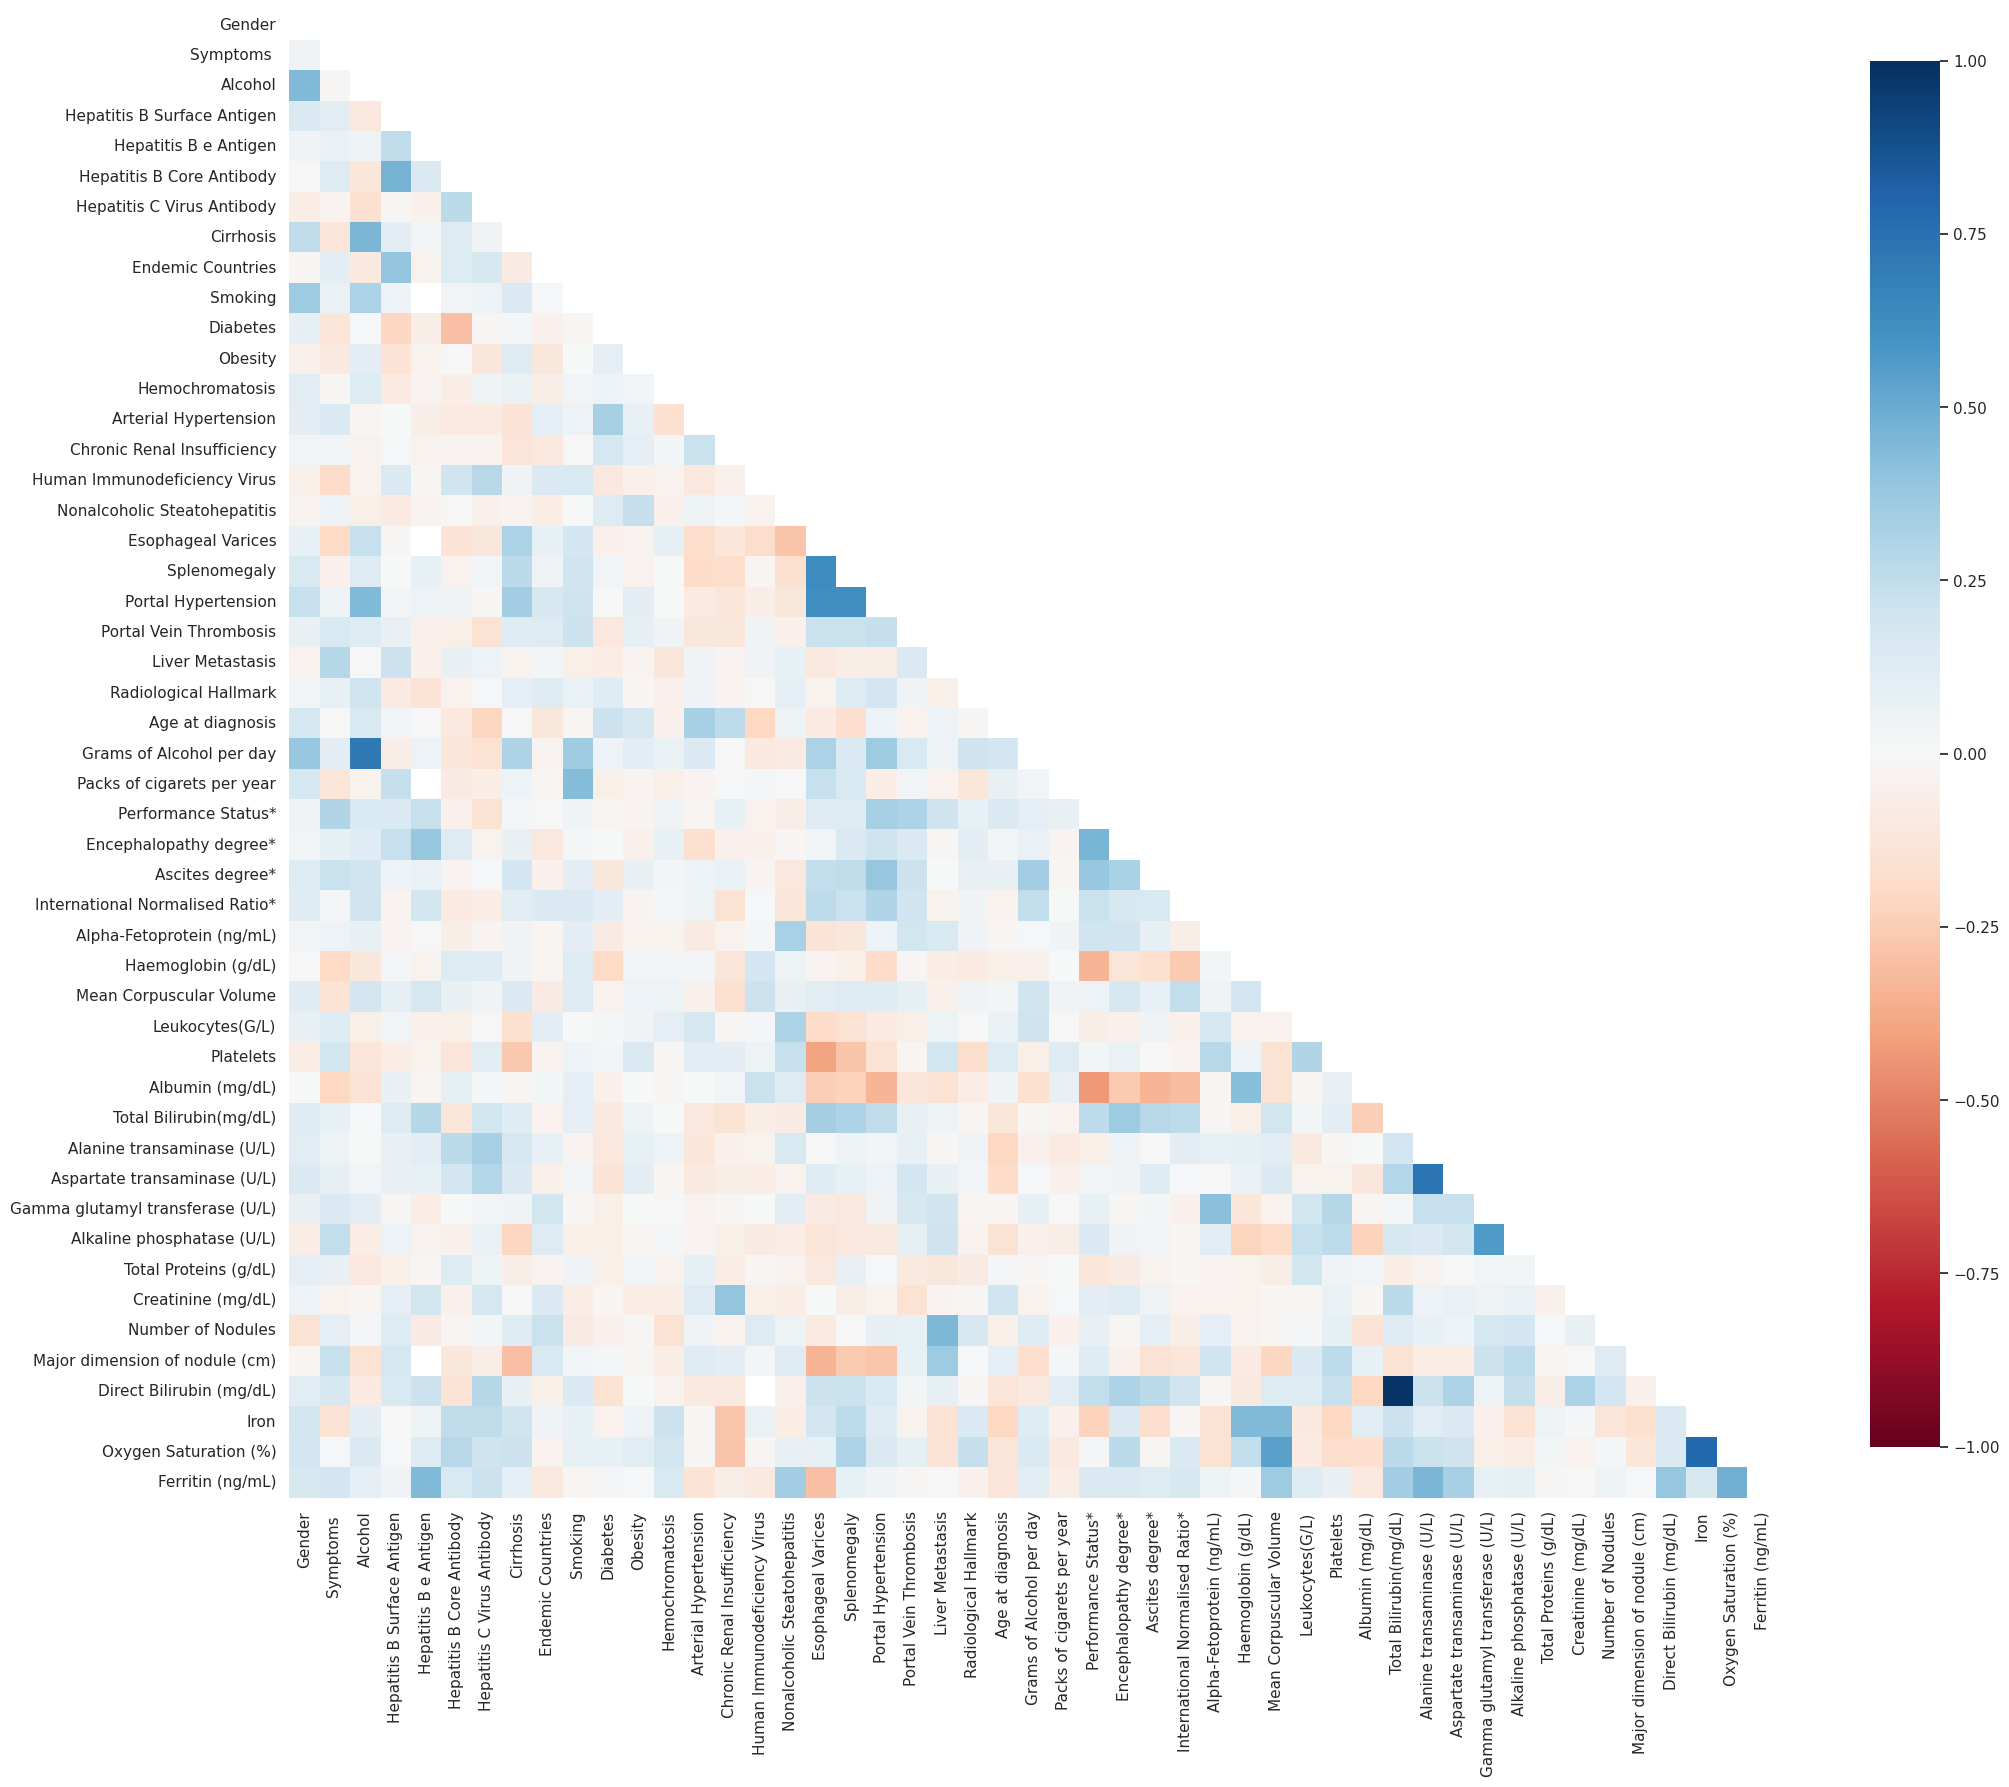

INFO:root:Running Univariate Analyses...
INFO:root:Plotting top significant 40 features.
INFO:root:###################################################
INFO:root:Significant Univariate Associations:
INFO:root:Alkaline phosphatase (U/L): (p-val = 8.425494437393163e-07)
INFO:root:Performance Status*: (p-val = 1.8787043290235831e-06)
INFO:root:Alpha-Fetoprotein (ng/mL): (p-val = 3.7632257667465082e-06)
INFO:root:Haemoglobin (g/dL): (p-val = 6.806983230077955e-05)
INFO:root:Albumin (mg/dL): (p-val = 0.0002097286566980117)
INFO:root:Symptoms : (p-val = 0.00033485297415731147)
INFO:root:Ascites degree*: (p-val = 0.0010580963945994142)
INFO:root:Direct Bilirubin (mg/dL): (p-val = 0.0013544764761447027)
INFO:root:Aspartate transaminase (U/L): (p-val = 0.0016188344745582482)
INFO:root:Ferritin (ng/mL): (p-val = 0.0019988859548087426)
INFO:root:Liver Metastasis: (p-val = 0.002993588224869906)
INFO:root:Iron: (p-val = 0.009131914019954513)
INFO:root:Portal Vein Thrombosis: (p-val = 0.0117430411554

In [19]:
from streamline.runners.dataprocess_runner import DataProcessRunner
dpr = DataProcessRunner(data_path, output_path, experiment_name, 
                exploration_list=exploration_list, plot_list=plot_list,
                class_label=class_label, instance_label=instance_label, 
                match_label=match_label, n_splits=n_splits, 
                partition_method=partition_method,
                ignore_features=ignore_features, 
                categorical_features=categorical_feature_headers, 
                top_features=top_features,
                categorical_cutoff=categorical_cutoff, sig_cutoff=sig_cutoff,
                featureeng_missingness=featureeng_missingness,
                cleaning_missingness=cleaning_missingness,
                correlation_removal_threshold=correlation_removal_threshold,
                random_state=random_state, show_plots=True)
dpr.run(run_parallel=False)

## Phase 2: Scaling and Imputation
After cell runs, you will see:
* No output other than code progress updates

In [20]:
from streamline.runners.imputation_runner import ImputationRunner
ir = ImputationRunner(output_path, experiment_name, 
                        scale_data=scale_data, impute_data=impute_data,
                        multi_impute=multi_impute, overwrite_cv=overwrite_cv, 
                        class_label=class_label, instance_label=instance_label, 
                        random_state=random_state)
ir.run(run_parallel=False)

INFO:root:Preparing Train and Test for: hcc-data_example_custom_CV_2
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example_custom Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_custom_CV_0
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example_custom Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_custom_CV_1
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example_custom Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_CV_0
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_examp

## Phase 3: Feature Importance Evaluation
After cell runs, you will see:
* No output other than code progress updates

In [21]:
feat_algorithms = []
if do_mutual_info:
    feat_algorithms.append("MI")
if do_multisurf:
    feat_algorithms.append("MS")

In [22]:
from streamline.runners.feature_runner import FeatureImportanceRunner
f_imp = FeatureImportanceRunner(output_path, experiment_name, 
                                class_label=class_label, 
                                instance_label=instance_label,
                                instance_subset=instance_subset, 
                                algorithms=feat_algorithms, 
                                use_turf=use_TURF, turf_pct=TURF_pct, 
                                random_state=random_state)
f_imp.run(run_parallel=False)

INFO:root:Loading Dataset: hcc-data_example_custom_CV_2_Train
INFO:root:Prepared Train and Test for: hcc-data_example_custom_CV_2
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example_custom CV2 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_custom_CV_0_Train
INFO:root:Prepared Train and Test for: hcc-data_example_custom_CV_0
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example_custom CV0 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_custom_CV_1_Train
INFO:root:Prepared Train and Test for: hcc-data_example_custom_CV_1
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example_custom CV1 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_custom_CV_2_Train
INFO:roo

## Phase 4: Feature Selection
After cell runs, for each target dataset and each feature importance algorithm you will see:
* Top feature importance scores
* A barplot of top feature imporance score ranking

INFO:root:Plotting Feature Importance Scores...
INFO:root:                           Feature  Importance
28       Alpha-Fetoprotein (ng/mL)    0.122190
24             Performance Status*    0.102941
44                            Iron    0.080971
38      Alkaline phosphatase (U/L)    0.078554
42  Major dimension of nodule (cm)    0.075015
46                Ferritin (ng/mL)    0.071803
0                        Symptoms     0.070594
33                 Albumin (mg/dL)    0.065591
29              Haemoglobin (g/dL)    0.059914
4        Hepatitis B Core Antibody    0.055815
INFO:root:Saved Feature Importance Plots at
INFO:root:/content/DemoOutput/demo_experiment/hcc-data_example_custom/feature_selection/mutual_information/TopAverageScores.png


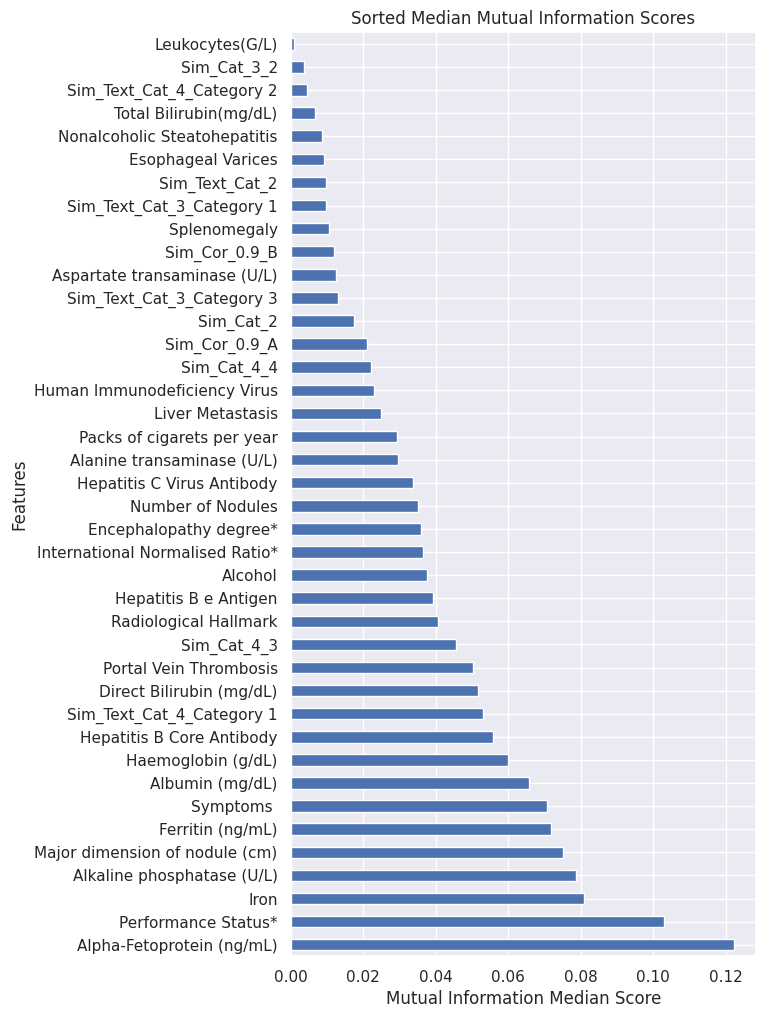

INFO:root:                             Feature  Importance
29                Haemoglobin (g/dL)    0.123375
38        Alkaline phosphatase (U/L)    0.089321
24               Performance Status*    0.074267
0                          Symptoms     0.060058
20                  Liver Metastasis    0.055325
26                   Ascites degree*    0.053220
37  Gamma glutamyl transferase (U/L)    0.045130
45             Oxygen Saturation (%)    0.042915
36      Aspartate transaminase (U/L)    0.039828
33                   Albumin (mg/dL)    0.036499
INFO:root:Saved Feature Importance Plots at
INFO:root:/content/DemoOutput/demo_experiment/hcc-data_example_custom/feature_selection/multisurf/TopAverageScores.png


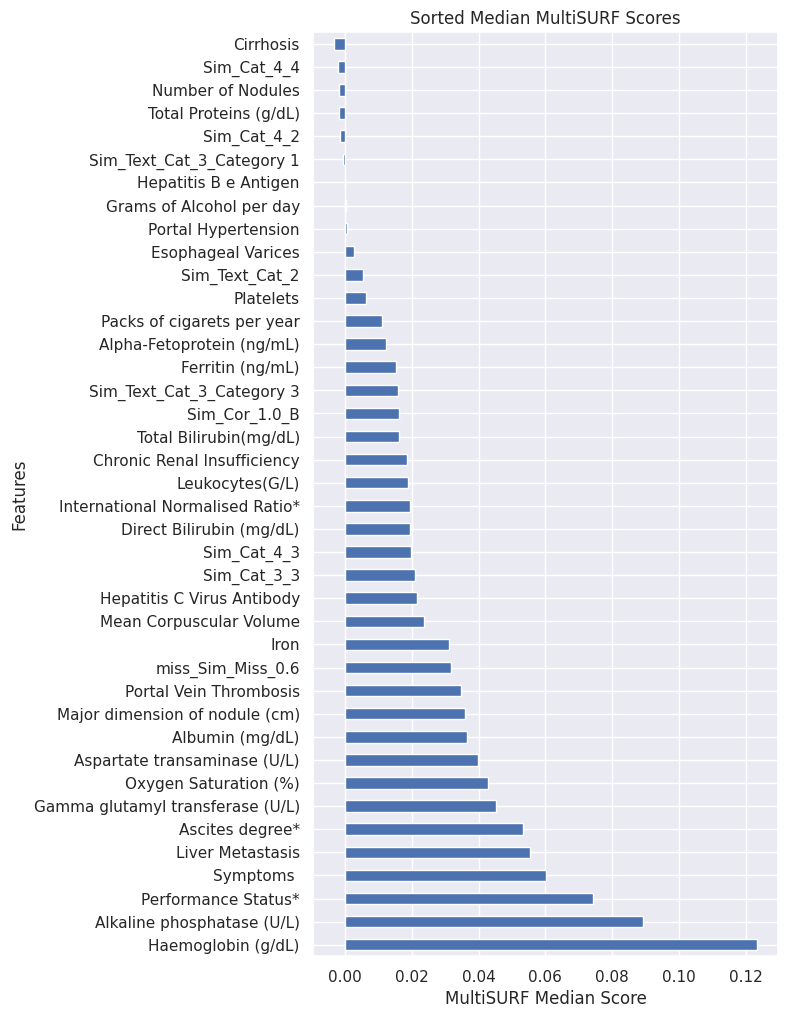

INFO:root:Applying collective feature selection...
INFO:root:hcc-data_example_custom Phase 4 Complete
INFO:root:Plotting Feature Importance Scores...
INFO:root:                           Feature  Importance
30       Alpha-Fetoprotein (ng/mL)    0.122169
26             Performance Status*    0.121332
1                        Symptoms     0.106487
40      Alkaline phosphatase (U/L)    0.076862
48                Ferritin (ng/mL)    0.069531
31              Haemoglobin (g/dL)    0.063325
23                Age at diagnosis    0.058108
44  Major dimension of nodule (cm)    0.055360
46                            Iron    0.050169
35                 Albumin (mg/dL)    0.046063
INFO:root:Saved Feature Importance Plots at
INFO:root:/content/DemoOutput/demo_experiment/hcc-data_example/feature_selection/mutual_information/TopAverageScores.png


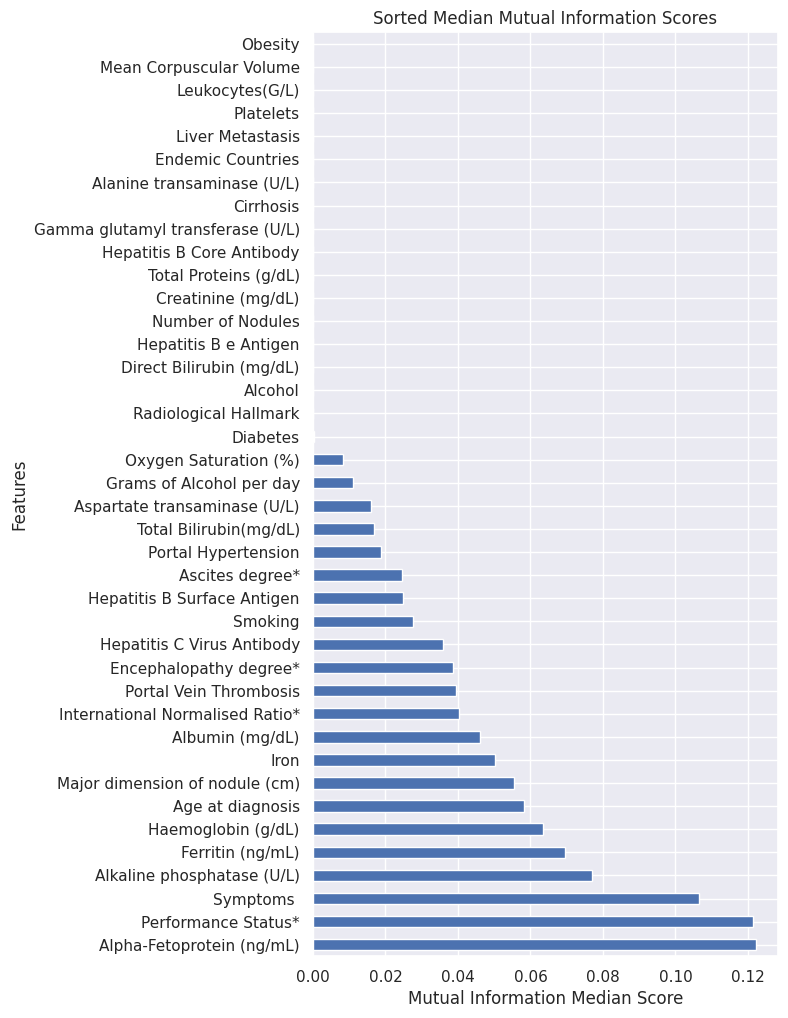

INFO:root:                             Feature  Importance
31                Haemoglobin (g/dL)    0.104576
40        Alkaline phosphatase (U/L)    0.102908
26               Performance Status*    0.082454
1                          Symptoms     0.066788
21                  Liver Metastasis    0.062477
47             Oxygen Saturation (%)    0.057565
46                              Iron    0.054272
28                   Ascites degree*    0.051462
39  Gamma glutamyl transferase (U/L)    0.042375
44    Major dimension of nodule (cm)    0.039364
INFO:root:Saved Feature Importance Plots at
INFO:root:/content/DemoOutput/demo_experiment/hcc-data_example/feature_selection/multisurf/TopAverageScores.png


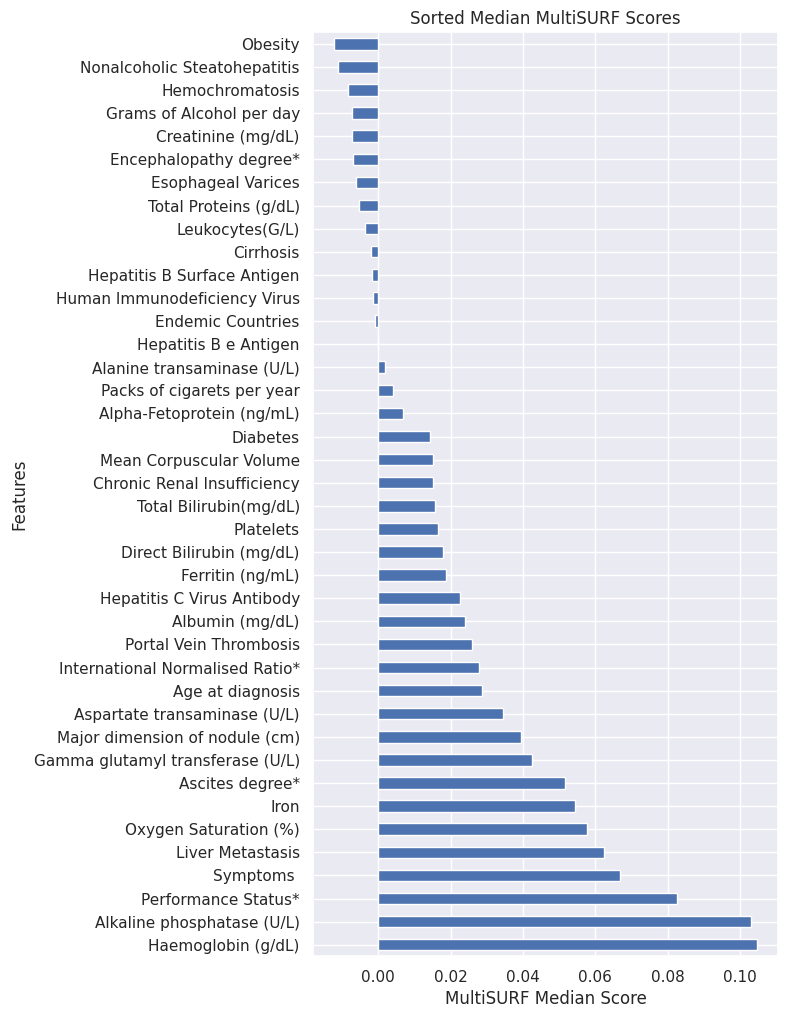

INFO:root:Applying collective feature selection...
INFO:root:hcc-data_example Phase 4 Complete


In [23]:
from streamline.runners.feature_runner import FeatureSelectionRunner
f_sel = FeatureSelectionRunner(output_path, experiment_name, 
                               feat_algorithms, class_label=class_label, 
                               instance_label=instance_label,
                               max_features_to_keep=max_features_to_keep, 
                               filter_poor_features=filter_poor_features, 
                               top_features=top_features, 
                               export_scores=export_scores,
                               overwrite_cv=overwrite_cv, 
                               random_state=random_state,
                               show_plots=True)
f_sel.run(run_parallel=False)

## Phase 5: Modeling
After cell runs, you will see:
* No output other than code progress bar completion

In [24]:
from streamline.runners.model_runner import ModelExperimentRunner
model_exp = ModelExperimentRunner(
                output_path, experiment_name, algorithms=algorithms, 
                exclude=exclude, class_label=class_label,
                instance_label=instance_label, scoring_metric=primary_metric, 
                metric_direction=metric_direction,
                training_subsample=training_subsample, 
                use_uniform_fi=use_uniform_FI, n_trials=n_trials,
                timeout=timeout, save_plots=False, 
                do_lcs_sweep=do_lcs_sweep, lcs_nu=lcs_nu, lcs_n=lcs_N, 
                lcs_iterations=lcs_iterations,
                lcs_timeout=lcs_timeout, resubmit=False)
model_exp.run(run_parallel=True)

100%|██████████| 18/18 [01:27<00:00,  4.87s/it]


## Phase 6: Statistics Summary and Figure Generation
After cell runs, for each target dataset you will see:
* ROC and PRC plots of CV folds for each algorithm
* An ROC and PRC plot comparing average algorithm performance across CV partitions
* Boxplots for each metric comparing algorithm performance (across CV partitions)
* Top feature importance boxplots for each algorithm (across CV partitions)
* Histogram of feature importance for each algorithm
* Composite feature importance plots

In [25]:
from streamline.runners.stats_runner import StatsRunner
stats = StatsRunner(output_path, experiment_name, 
                    algorithms=algorithms, exclude=exclude, 
                    class_label=class_label, instance_label=instance_label, 
                    scoring_metric=primary_metric,
                    top_features=top_model_features, sig_cutoff=sig_cutoff, 
                    metric_weight=metric_weight, scale_data=scale_data,
                    plot_roc=plot_ROC, plot_prc=plot_PRC, 
                    plot_fi_box=plot_FI_box, 
                    plot_metric_boxplots=plot_metric_boxplots, 
                    show_plots=True)
stats.run(run_parallel=False)

Output hidden; open in https://colab.research.google.com to view.

## Phase 7: Dataset Comparison (Optional: Use only if > 1 dataset was analyzed)
Assuming STREAMLINE was run on more than 1 dataset. After cell runs, for each evaluation metric you will see:
* Boxplots comparing perfomance across analyized target datasets 

In [26]:
#@title Function to check length for more than one dataset case
def len_datasets(output_path, experiment_name):
    datasets = os.listdir(output_path + '/' + experiment_name)
    remove_list = ['metadata.pickle', 'metadata.csv', 'algInfo.pickle',
                   'jobsCompleted', 'logs', 'jobs', 'DatasetComparisons', 'UsefulNotebooks',
                   experiment_name + '_ML_Pipeline_Report.pdf']
    for text in remove_list:
        if text in datasets:
            datasets.remove(text)
    return len(datasets)

INFO:root:Running Statistical Significance Comparisons Between Multiple Datasets...
INFO:root:Generate Boxplots Comparing Dataset Performance...


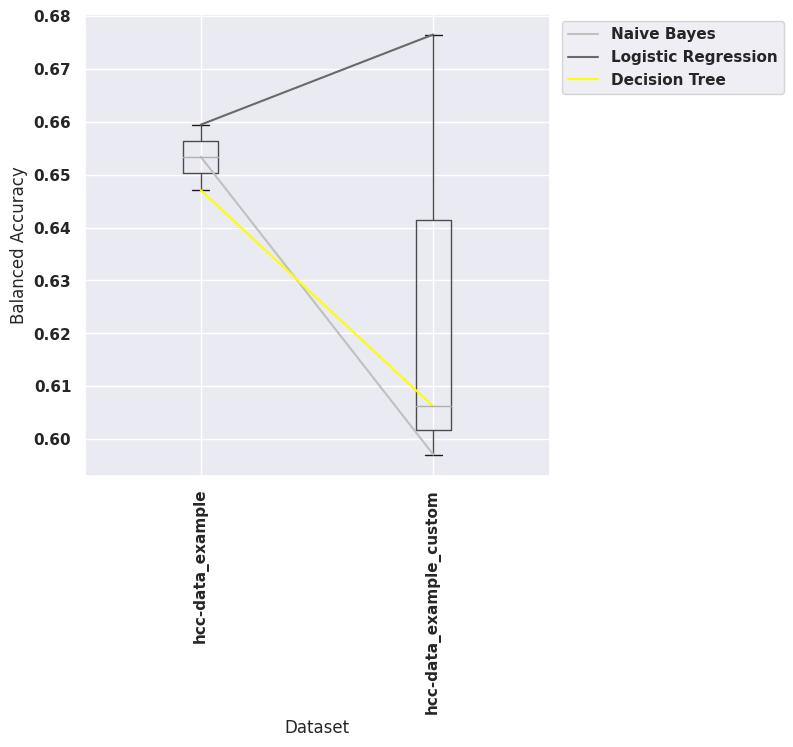

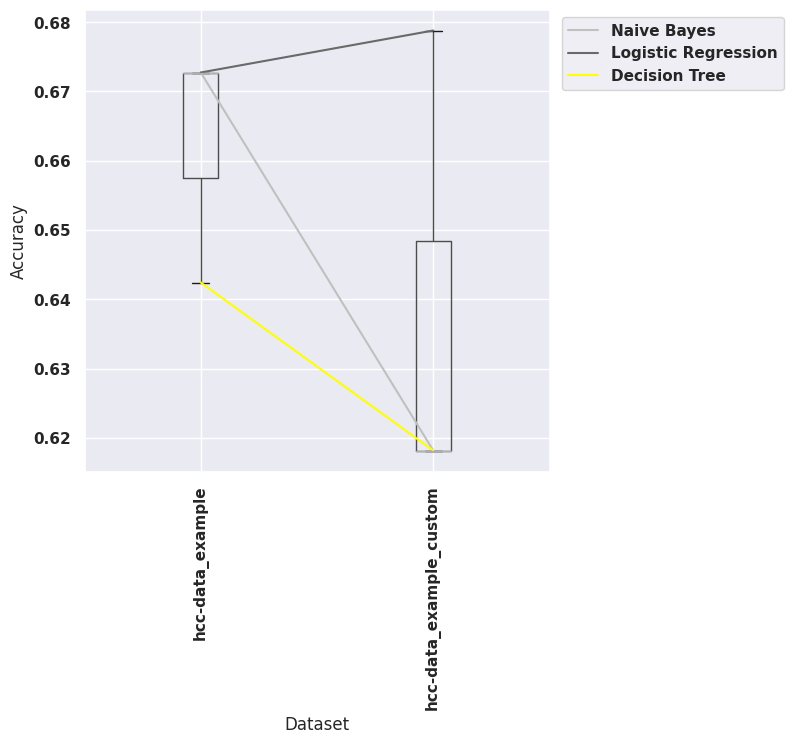

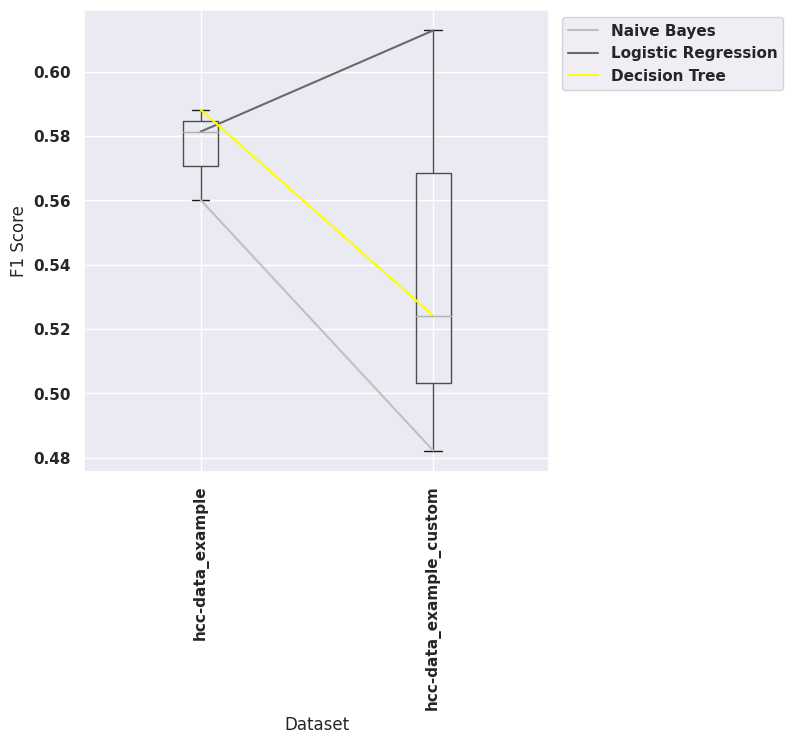

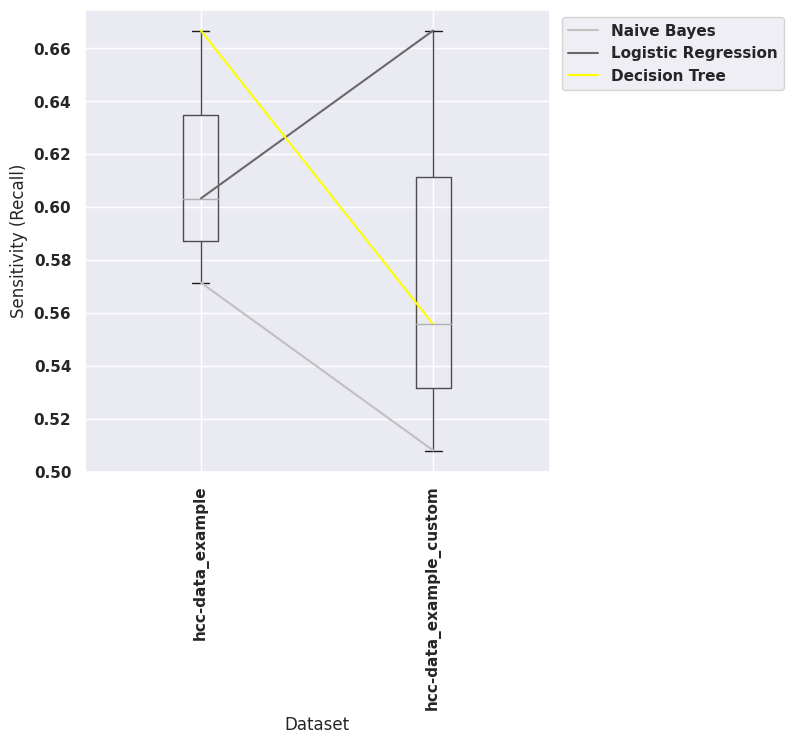

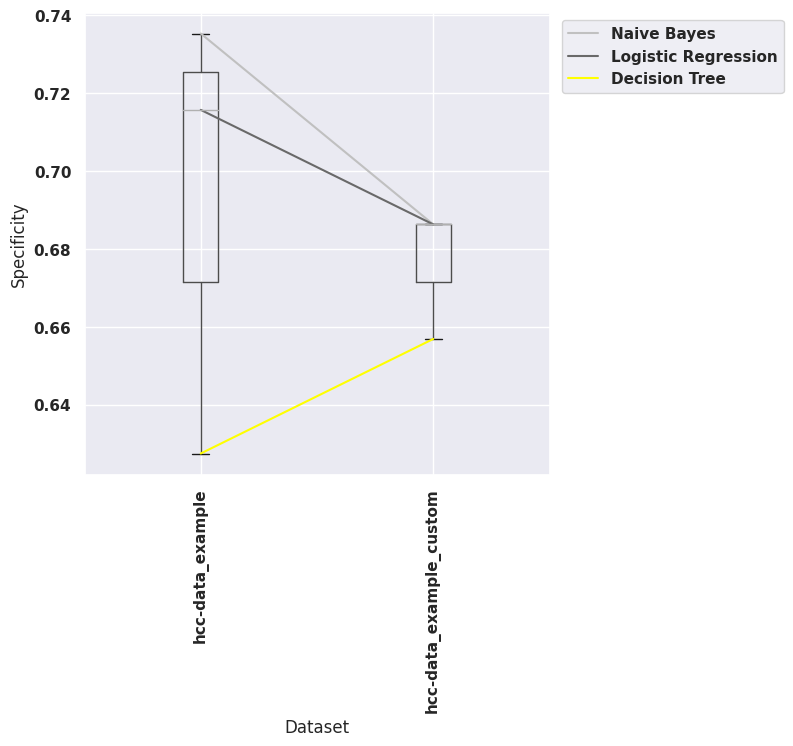

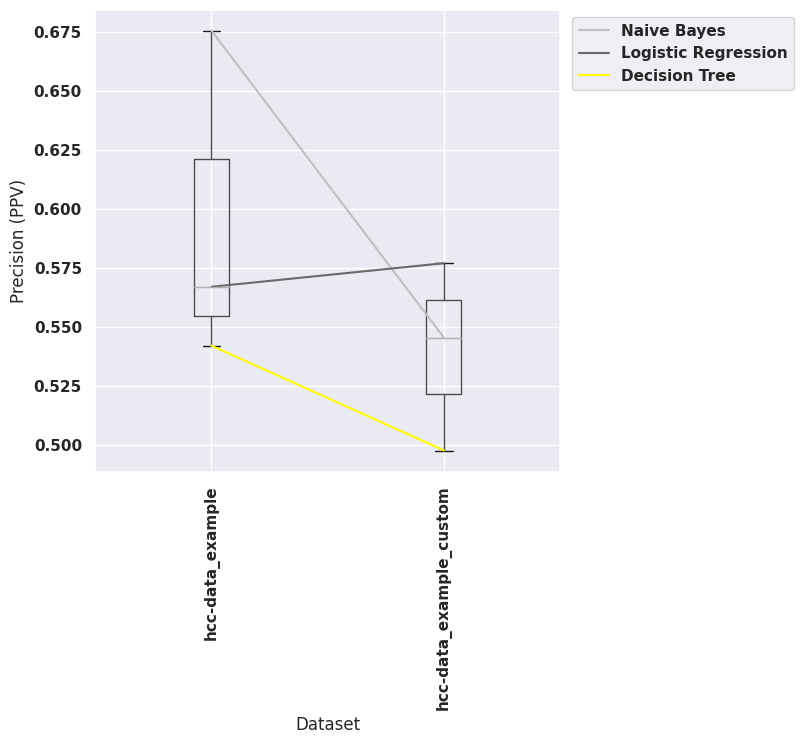

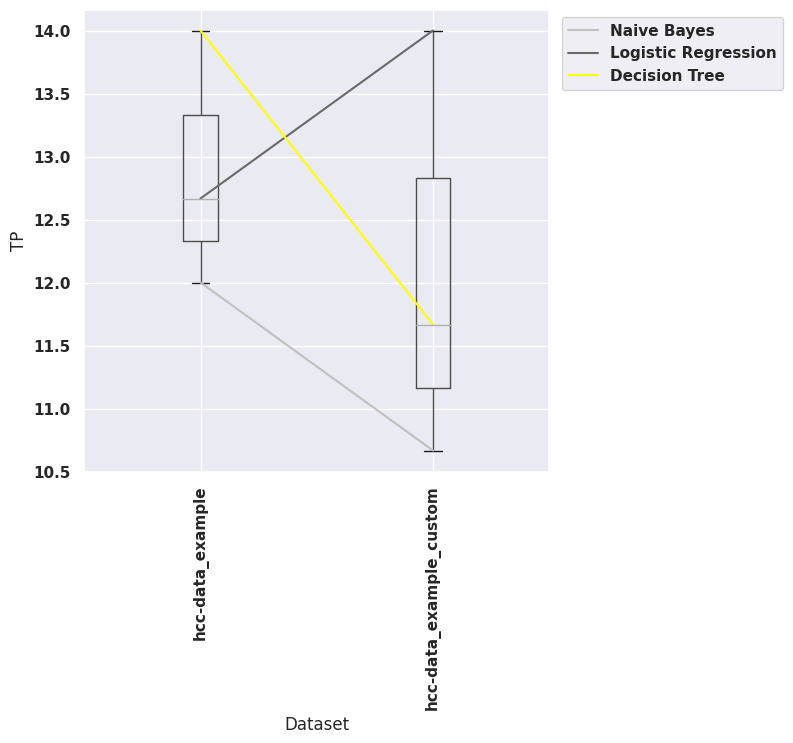

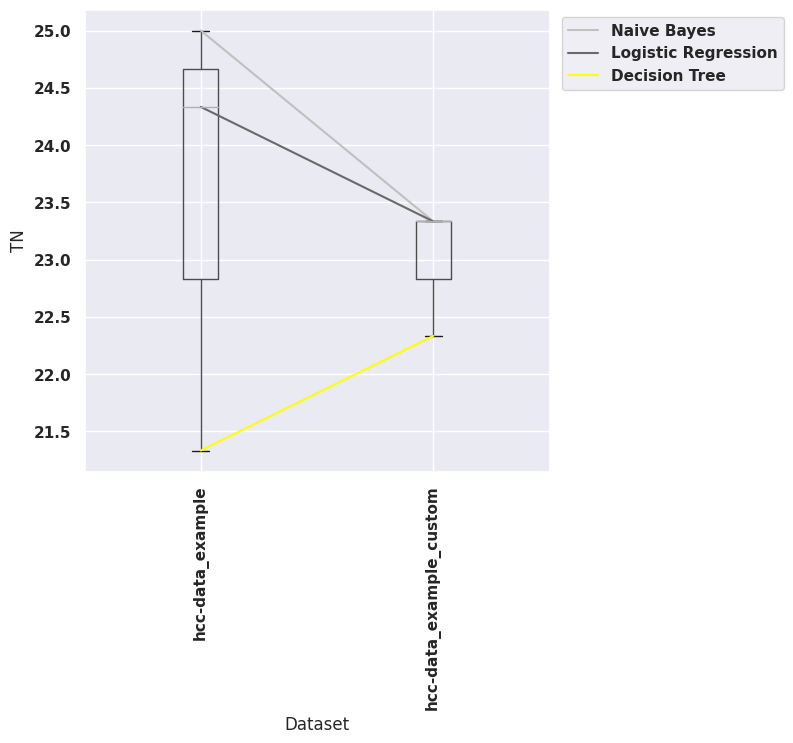

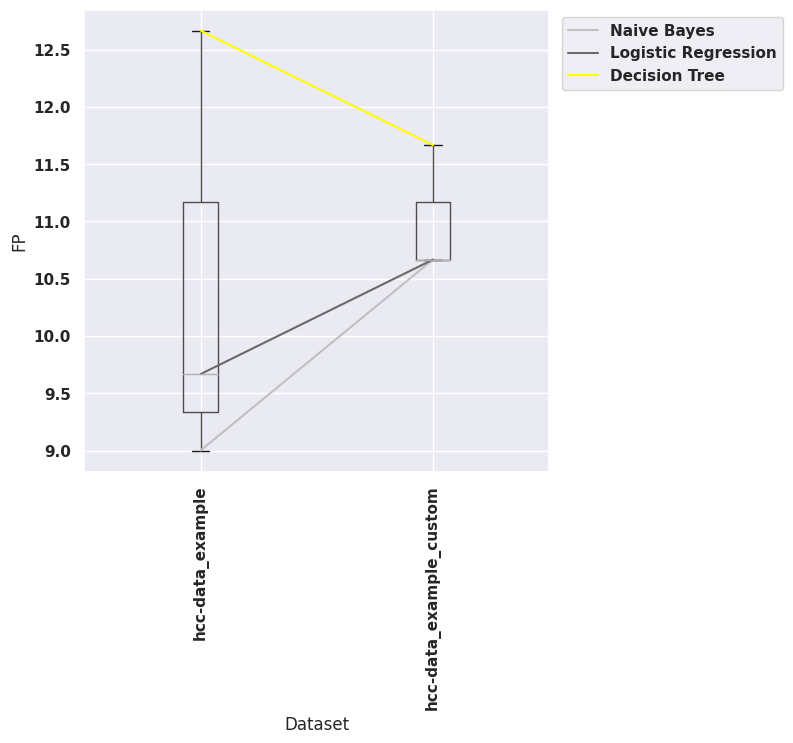

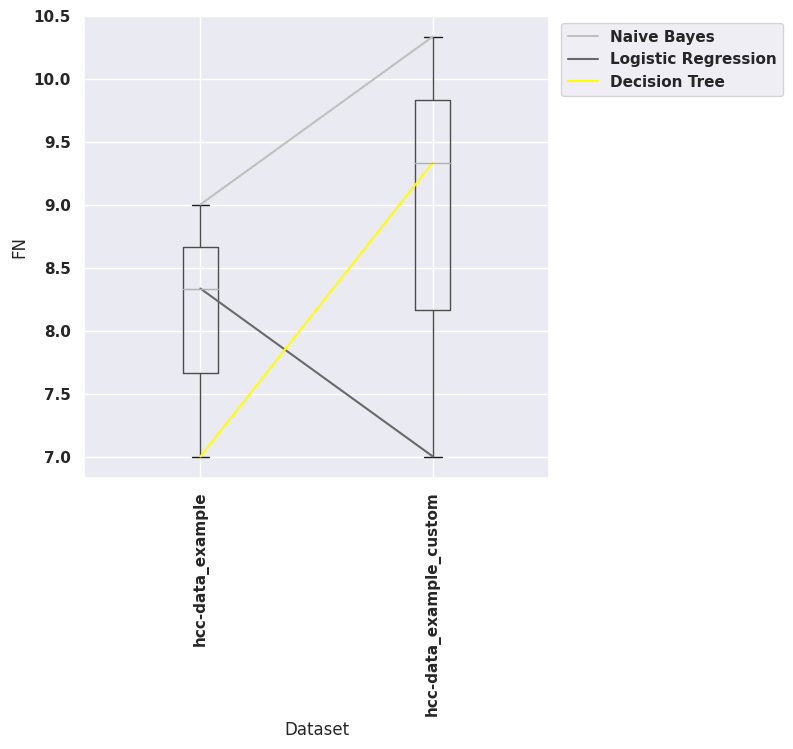

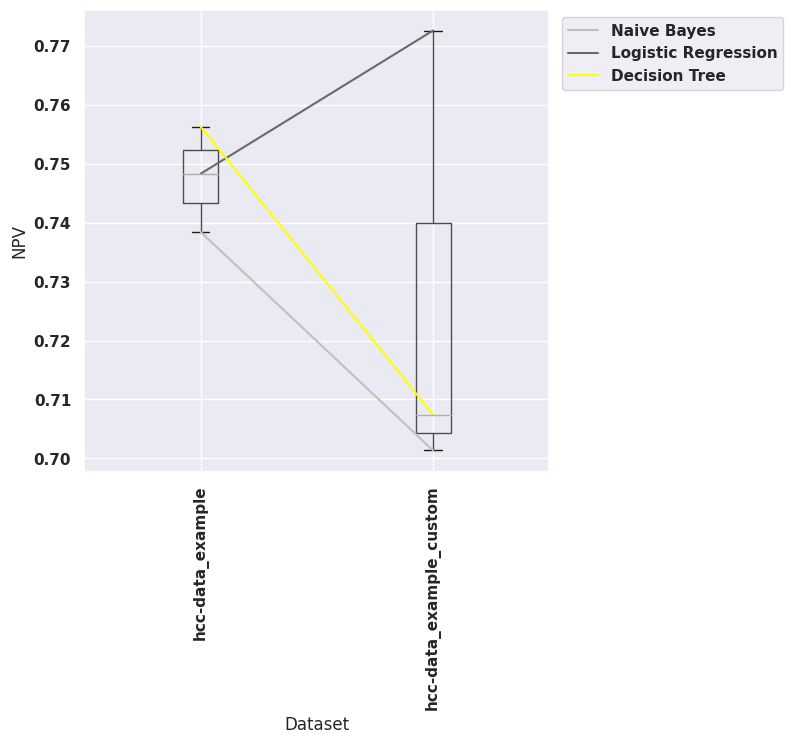

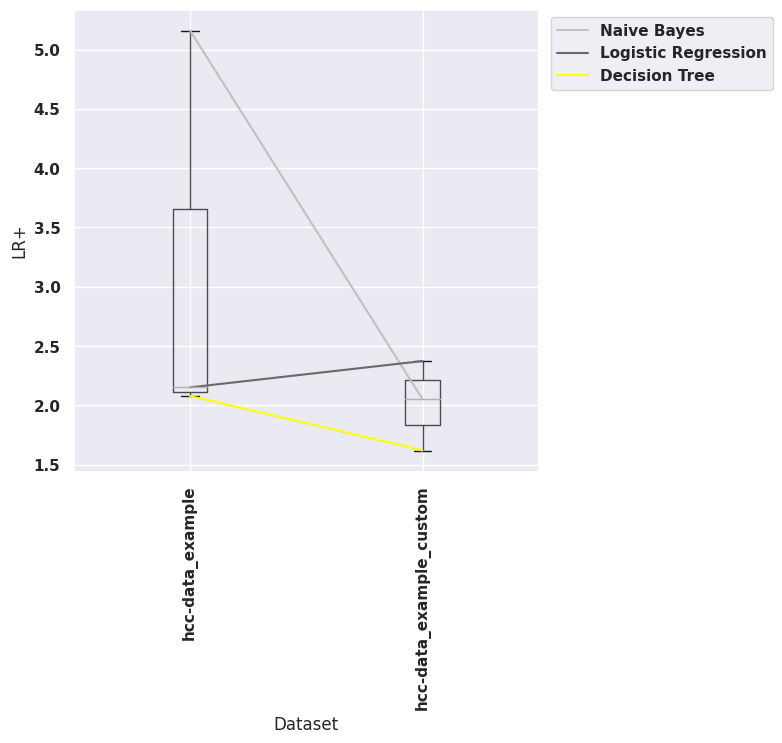

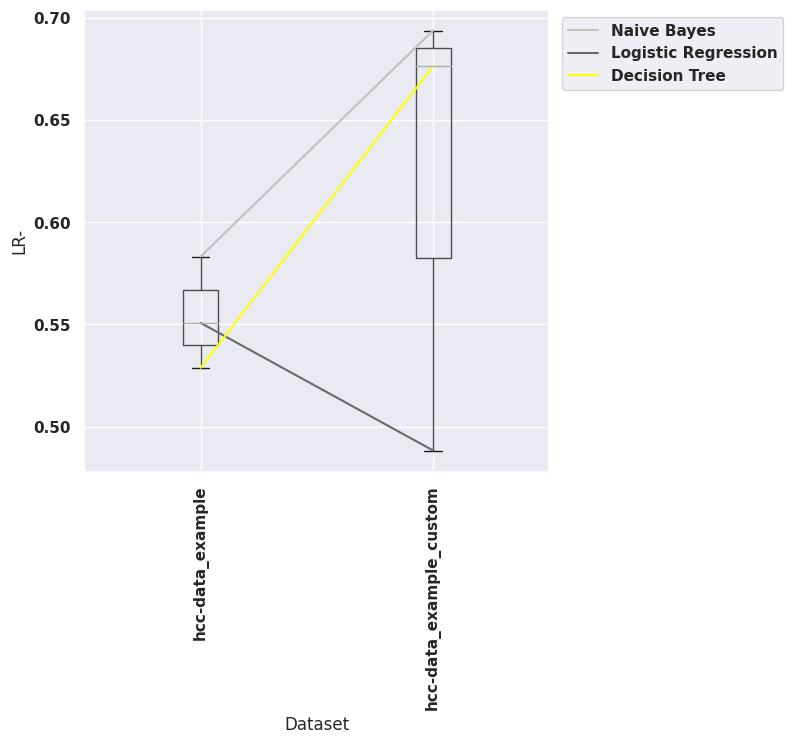

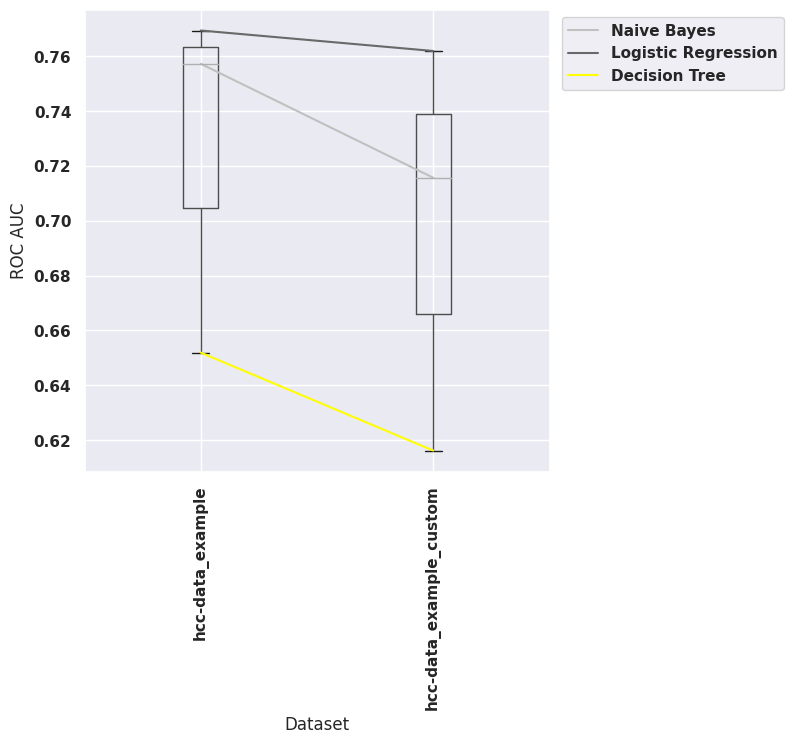

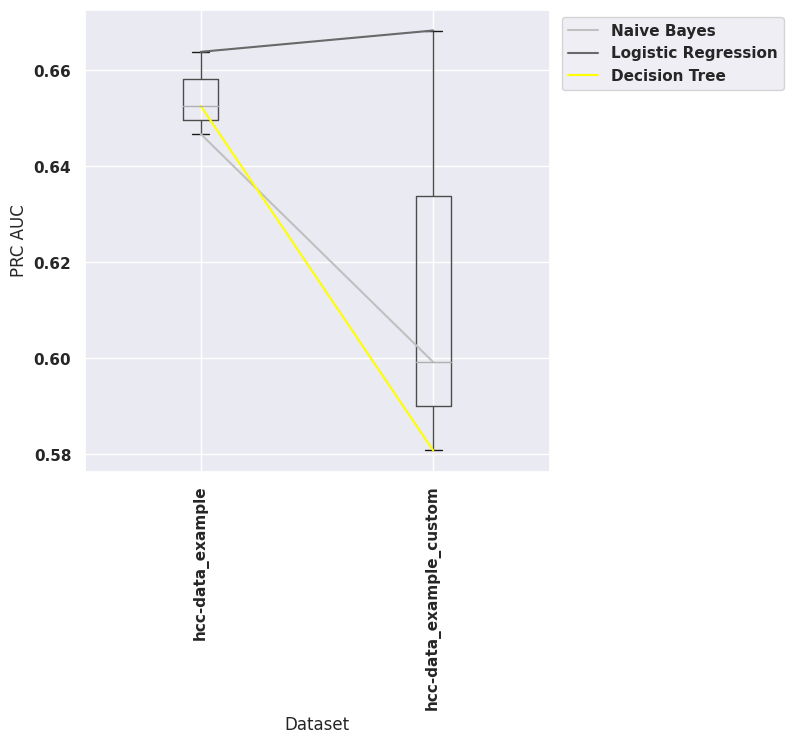

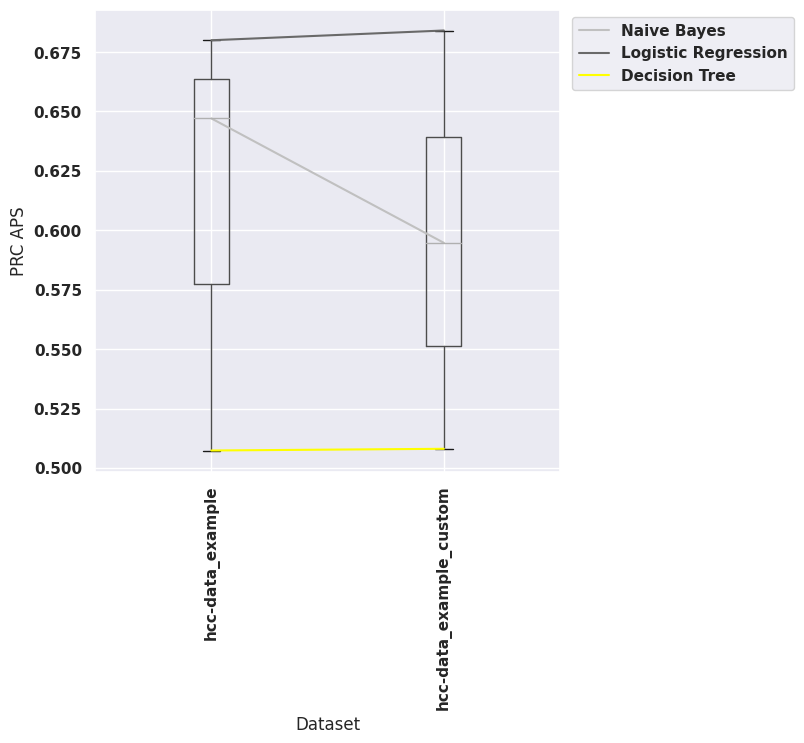

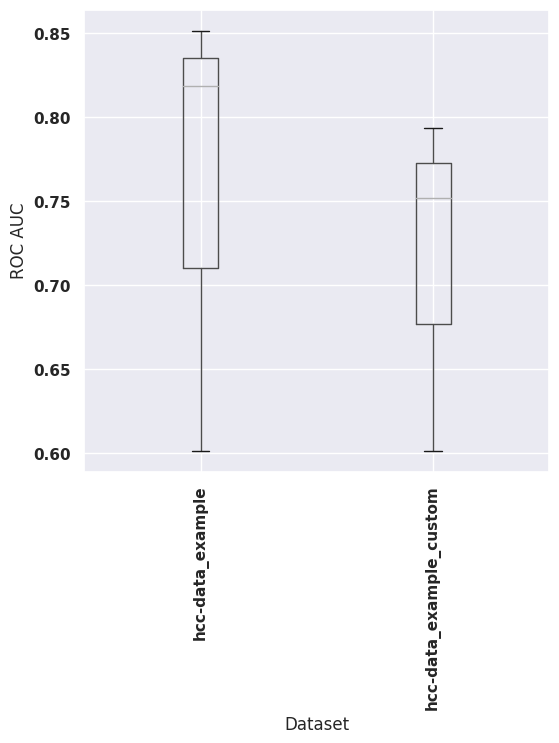

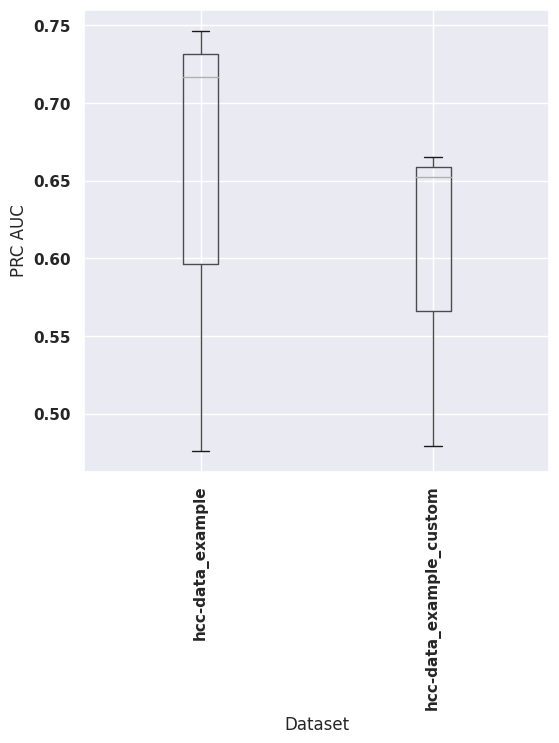

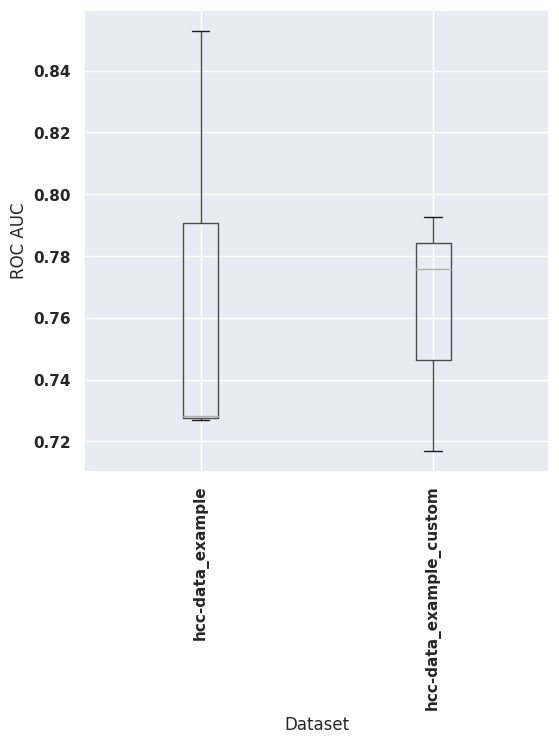

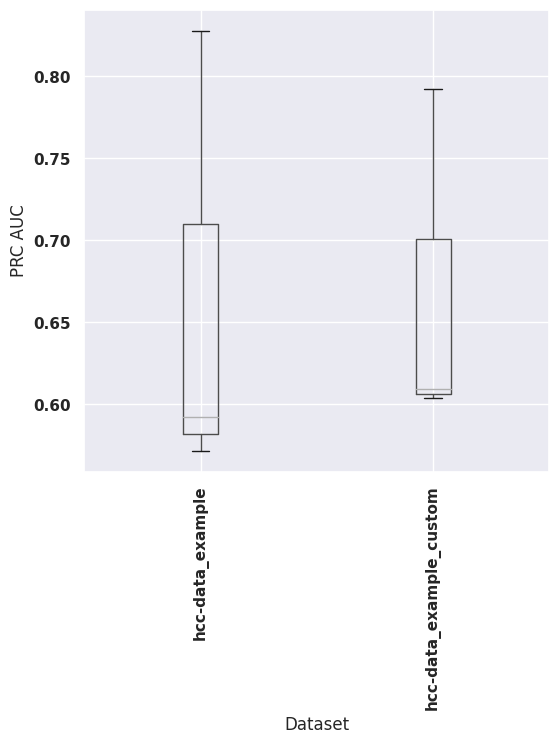

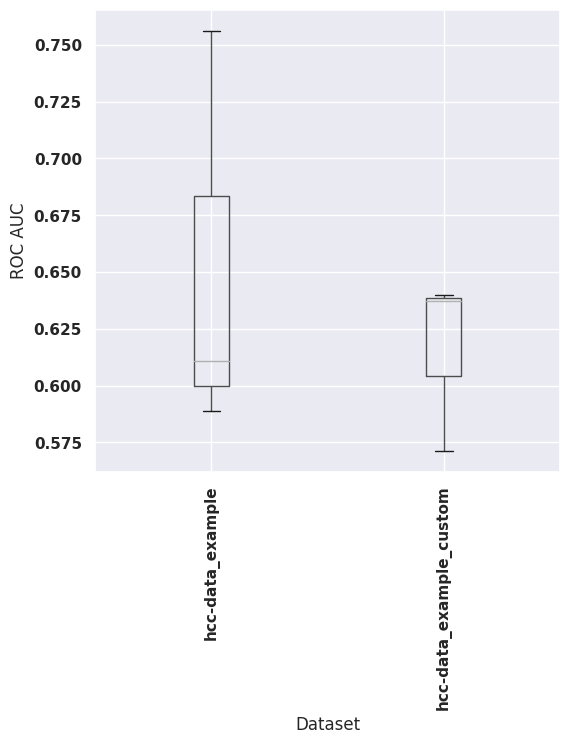

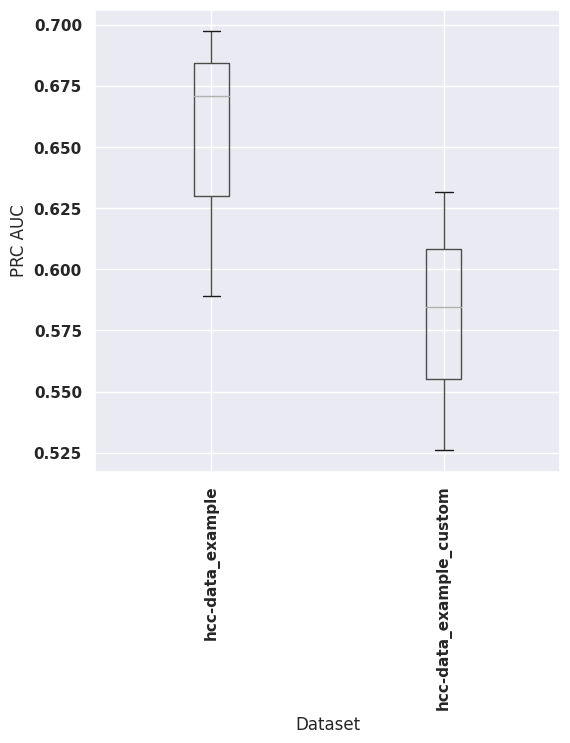

INFO:root:Phase 7 complete


In [27]:
from streamline.runners.compare_runner import CompareRunner
if len_datasets(output_path, experiment_name) > 1:
    cmp = CompareRunner(output_path, experiment_name, algorithms=algorithms,
                        exclude=exclude, sig_cutoff=sig_cutoff,
                        class_label=class_label, instance_label=instance_label,
                        show_plots=True)
    cmp.run(run_parallel=False)

## Phase 8: PDF Training Report Generator (Optional)
Downloads a PDF report of the analysis

In [28]:
from streamline.runners.report_runner import ReportRunner
rep = ReportRunner(output_path, experiment_name, 
                   algorithms=algorithms, exclude=exclude)
rep.run(run_parallel=False)

INFO:root:Starting Report
INFO:root:Publishing Univariate Analysis
INFO:root:Publishing Model Prediction Summary
INFO:root:Publishing Average Model Prediction Statistics
INFO:root:Publishing Median Model Prediction Statistics
INFO:root:Publishing Feature Importance Summaries
INFO:root:Publishing Dataset Comparison Boxplots
INFO:root:Publishing Statistical Analysis
INFO:root:Publishing Runtime Summary
INFO:root:Phase 8 complete


## Phase 9: Apply Models to Replication Data (Optional)

In [29]:
if applyToReplication:
    from streamline.runners.replicate_runner import ReplicationRunner
    repl = ReplicationRunner(rep_data_path, dataset_for_rep, output_path, 
                             experiment_name, load_algo=True,
                             export_feature_correlations=True, 
                             plot_roc=True, plot_prc=True, plot_metric_boxplots=True)
    repl.run(run_parallel=False)

INFO:root:Loading Dataset: hcc-data_example_custom_rep
INFO:root:Loading Dataset: hcc-data_example_custom
INFO:root:Identifying Feature Types...
INFO:root:Initial Data Counts: ----------------
INFO:root:Instance Count = 171
INFO:root:Feature Count = 61
INFO:root:    Categorical  = 27
INFO:root:    Quantitative = 34
INFO:root:Missing Count = 1181
INFO:root:    Missing Percent = 0.11322020899242642
INFO:root:Class Counts: ----------------
INFO:root:Class Count Information
INFO:root:
   Class  Instances
0      0        115
1      1         56
INFO:root:Processed Data Counts: ----------------
INFO:root:Instance Count = 171
INFO:root:Feature Count = 69
INFO:root:    Categorical  = 48
INFO:root:    Quantitative = 21
INFO:root:Missing Count = 942
INFO:root:    Missing Percent = 0.0798372743452835
INFO:root:Class Counts: ----------------
INFO:root:Class Count Information
INFO:root:
   Class  Instances
0      0        115
1      1         56
INFO:root:Final List of Features:
INFO:root:['Symptom

hcc-data_example_custom_rep phase 9 complete


## Phase 10: PDF Apply Report Generator (Optional)

In [30]:
if applyToReplication:
    from streamline.runners.report_runner import ReportRunner
    rep = ReportRunner(output_path=output_path, experiment_name=experiment_name,
                       algorithms=algorithms, exclude=exclude, training=False, 
                       rep_data_path=rep_data_path, 
                       dataset_for_rep=dataset_for_rep)
    rep.run(run_parallel=False)

INFO:root:Starting Report
INFO:root:Publishing Model Prediction Summary
INFO:root:Publishing Average Model Prediction Statistics
INFO:root:Publishing Median Model Prediction Statistics
INFO:root:Phase 10 complete


## Phase 11: File Cleanup (Optional)

In [31]:
from streamline.runners.clean_runner import CleanRunner
clean = CleanRunner(output_path, experiment_name, del_time=del_time, del_old_cv=del_old_cv)
# run_parallel is not used in clean
clean.run()

### Download and Open PDF Summary Report(s)


In [32]:
from google.colab import files
files.download(output_path + '/' + experiment_name + '/' + experiment_name + '_ML_Pipeline_Report.pdf') 

if applyToReplication:
    dataset_name = dataset_for_rep.split('/')[-1].split('.')[0]
    #from google.colab import files
    pdf_files = []
    for dirpath, dirnames, filenames in os.walk(output_path + '/' + experiment_name 
                                                + '/' + dataset_name + '/applymodel/'):
        for filename in [f for f in filenames if f.endswith(".pdf")]:
            pdf_files.append(os.path.join(dirpath, filename))
    for file_path in pdf_files:
        files.download(file_path) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Zip the experiment folder and download.

In [33]:
experiment_folder = output_path + '/' + experiment_name
!zip -r -q /content/{experiment_name}.zip {experiment_folder}
from google.colab import files
files.download('/content/' + experiment_name + '.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
#Return notebook to original directory to avoid nested STREAMLINE download bug.
os.chdir(original_wd)